# Hyperparameter Optimization (HPO) of Machine Learning Models

### **Sample code for classification problems**  
**Dataset used:**  
&nbsp; Breast Cancer

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Classification accuracy

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "arff",
    "tqdm",
    "ucimlrepo"
]

install_packages(packages_to_install)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import keras
import sys
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
from tpot import TPOTClassifier
from random import randint
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer, recall_score, f1_score, precision_score, log_loss
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend
from sklearn import datasets
from random import randrange as sp_randrange
from scipy.stats import randint as sp_randint
from pandas import read_csv
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import svm

## Load dataset


In [44]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

print(X.columns)
print(y)
y = LabelEncoder().fit_transform(y.values.ravel())
print(y)

#X = X.drop(columns=['ID'])
X= MinMaxScaler().fit_transform(X)

print(X)
print(y)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

**Preprocessing**

In [45]:
import numpy as np
from collections import Counter

#(M (malignant) and B (benign).)
class_names = {0: "Benigno", 1: "Maligno"}

class_counts = Counter(y)
total_samples = len(y)

print("Analisi del bilancio delle classi:")
print("-----------------------")
for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    class_name = class_names[class_label]
    print(f"Classe {class_label} ({class_name}): {count} campioni ({percentage:.2f}%)")

print(f"\nCampioni totali: {total_samples}")

# Calcola il rapporto di sbilanciamento
if len(class_counts) == 2:
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)
    imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]
    print(f"\nRapporto di sbilanciamento ({class_names[majority_class]}:{class_names[minority_class]}): {imbalance_ratio:.2f}:1")

Analisi del bilancio delle classi:
-----------------------
Classe 1 (Maligno): 212 campioni (37.26%)
Classe 0 (Benigno): 357 campioni (62.74%)

Campioni totali: 569

Rapporto di sbilanciamento (Benigno:Maligno): 1.68:1


In [46]:
def analyze_feature_balance(X, feature_name):
    if X[feature_name].dtype in ['int64', 'float64']:
        # Per feature numeriche
        bins = pd.cut(X[feature_name], bins=5)
        counts = bins.value_counts().sort_index()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for bin_range, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {bin_range}: {count} campioni ({percentage:.2f}%)")
    else:
        # Per feature categoriche
        counts = X[feature_name].value_counts()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for value, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count} campioni ({percentage:.2f}%)")

# Analisi del dataset del cancro al seno
breast_cancer = fetch_ucirepo(id=17)
X_breast = breast_cancer.data.features
print("Analisi del bilanciamento delle feature per il dataset del cancro al seno:")
print("------------------------------------------------------------------------")
for column in X_breast.columns:
    analyze_feature_balance(X_breast, column)

Analisi del bilanciamento delle feature per il dataset del cancro al seno:
------------------------------------------------------------------------

Distribuzione della feature 'radius1':
  (6.96, 11.207]: 98 campioni (17.22%)
  (11.207, 15.433]: 314 campioni (55.18%)
  (15.433, 19.658]: 105 campioni (18.45%)
  (19.658, 23.884]: 45 campioni (7.91%)
  (23.884, 28.11]: 7 campioni (1.23%)

Distribuzione della feature 'texture1':
  (9.68, 15.624]: 113 campioni (19.86%)
  (15.624, 21.538]: 299 campioni (52.55%)
  (21.538, 27.452]: 129 campioni (22.67%)
  (27.452, 33.366]: 25 campioni (4.39%)
  (33.366, 39.28]: 3 campioni (0.53%)

Distribuzione della feature 'perimeter1':
  (43.645, 72.732]: 108 campioni (18.98%)
  (72.732, 101.674]: 301 campioni (52.90%)
  (101.674, 130.616]: 111 campioni (19.51%)
  (130.616, 159.558]: 42 campioni (7.38%)
  (159.558, 188.5]: 7 campioni (1.23%)

Distribuzione della feature 'area1':
  (141.142, 615.0]: 344 campioni (60.46%)
  (615.0, 1086.5]: 148 campioni (26

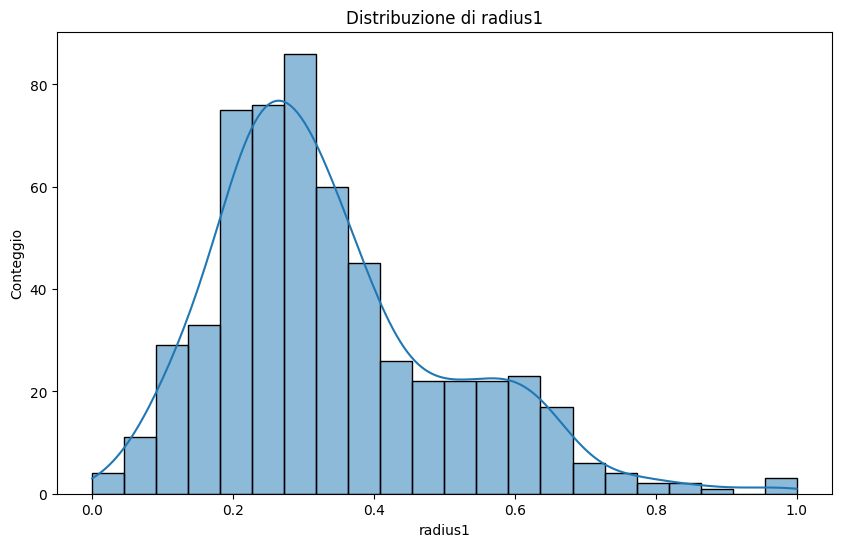

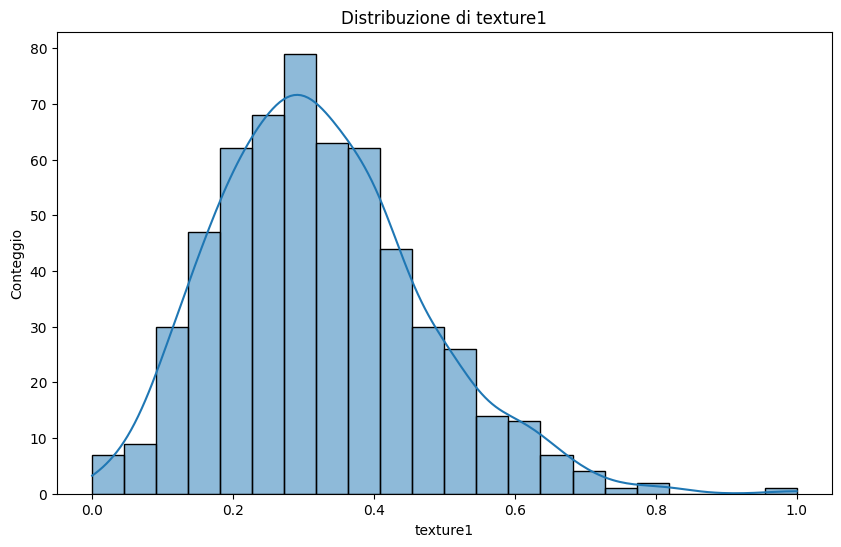

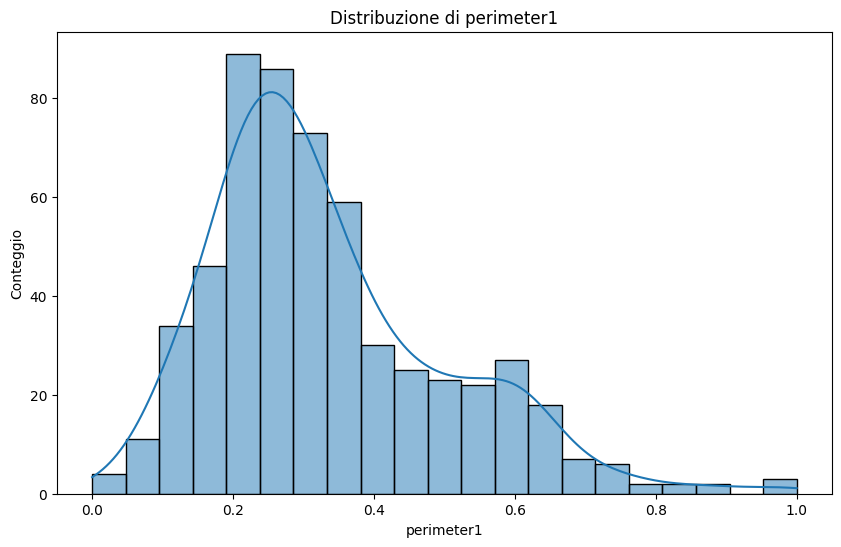

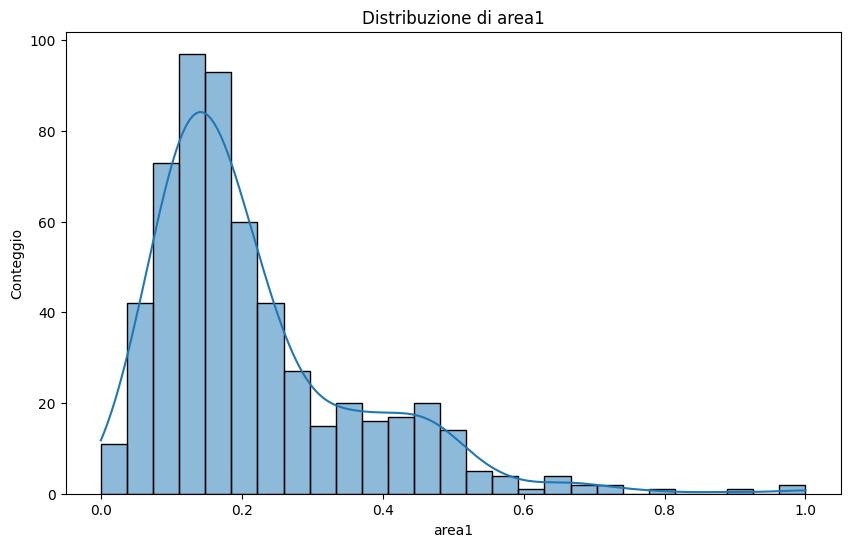

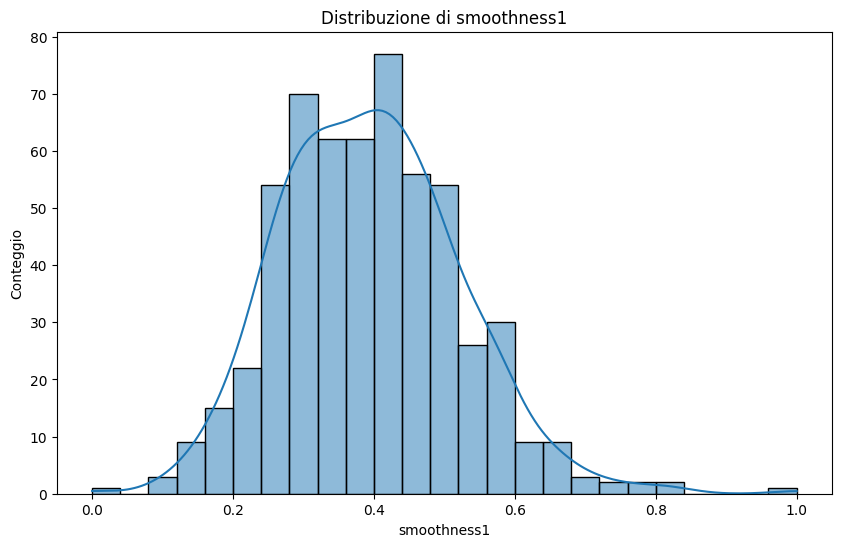

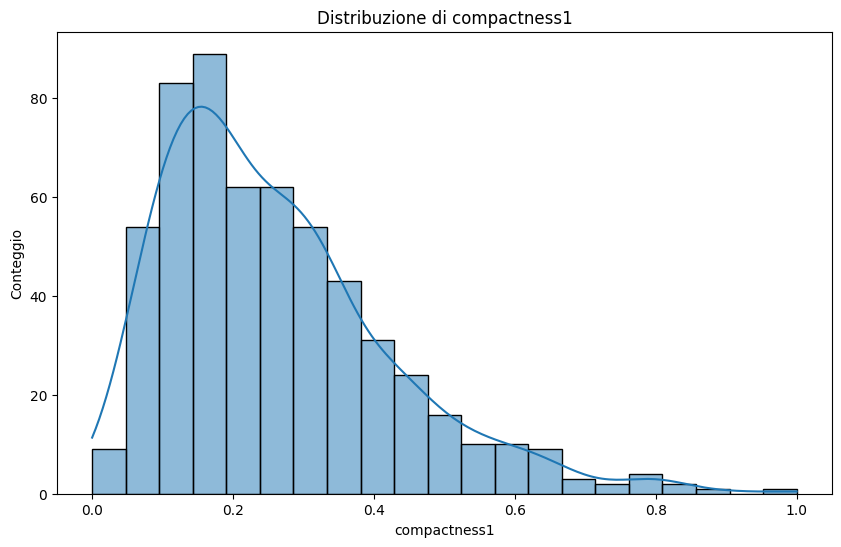

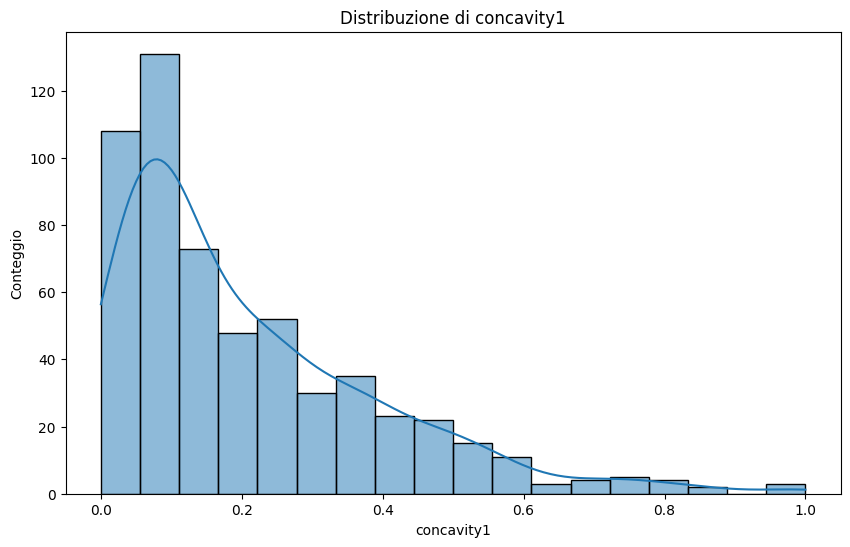

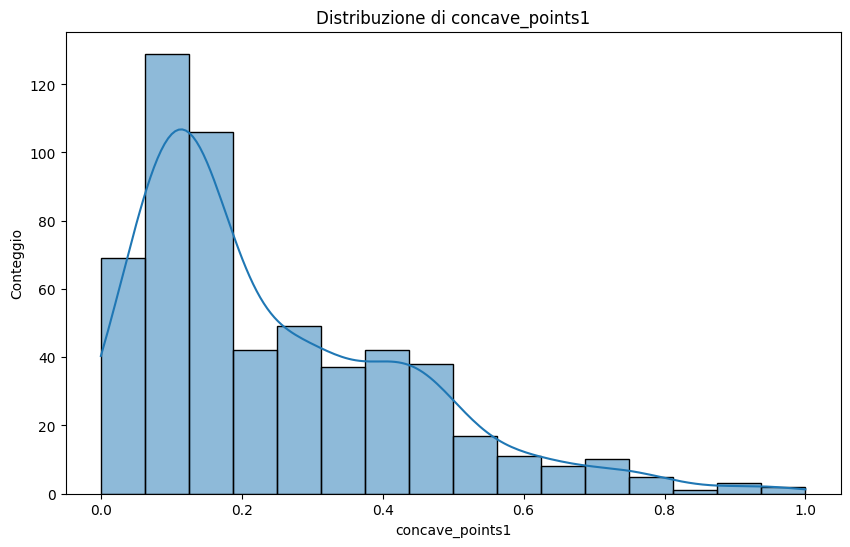

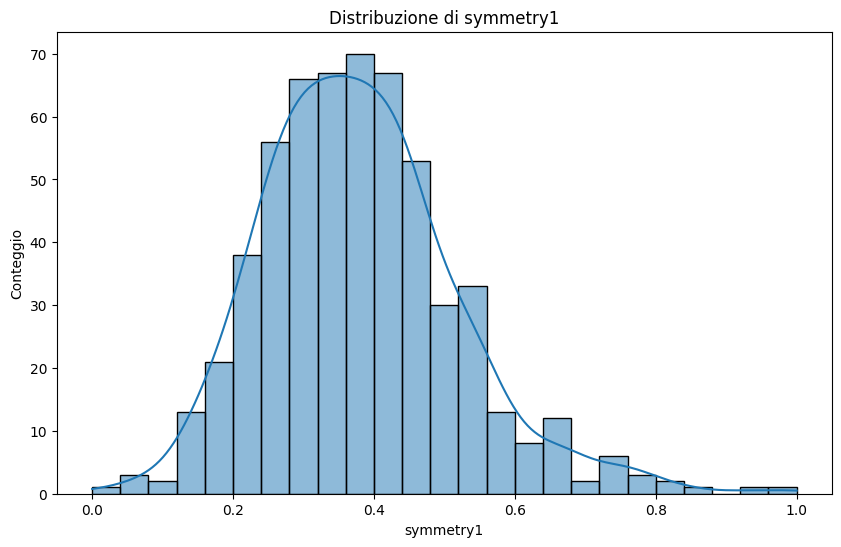

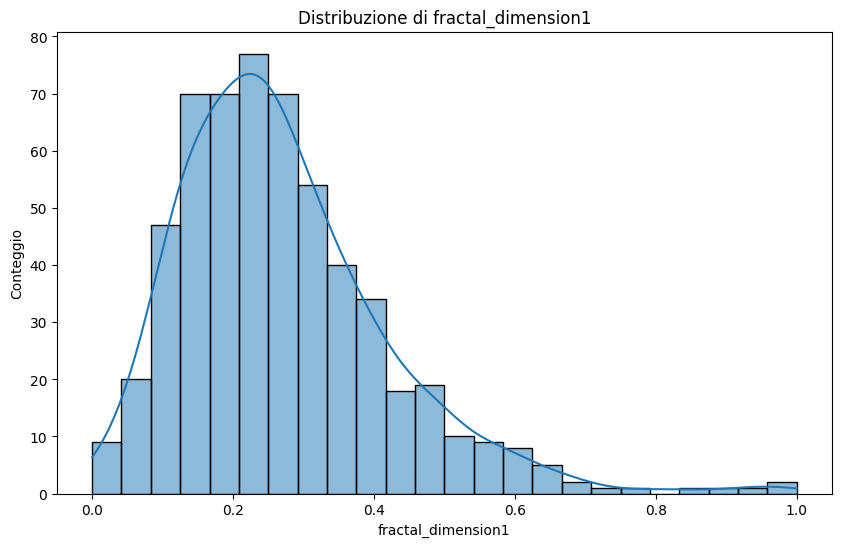

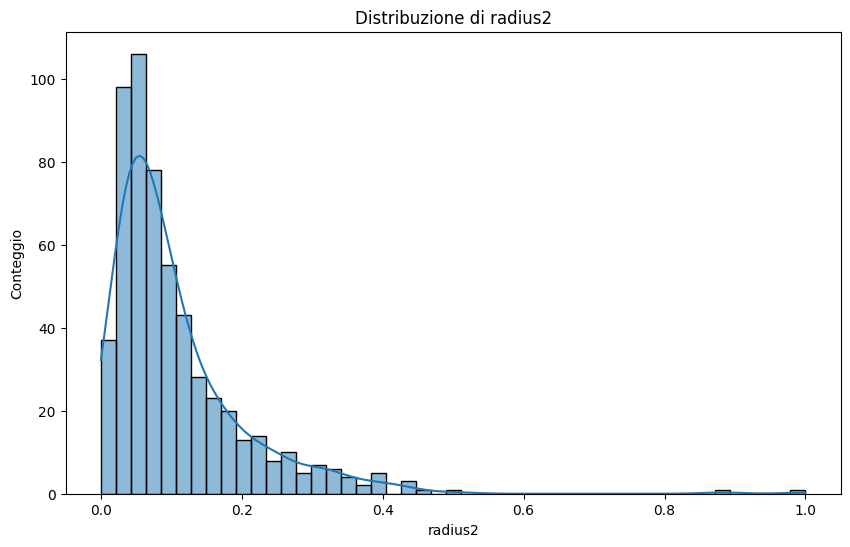

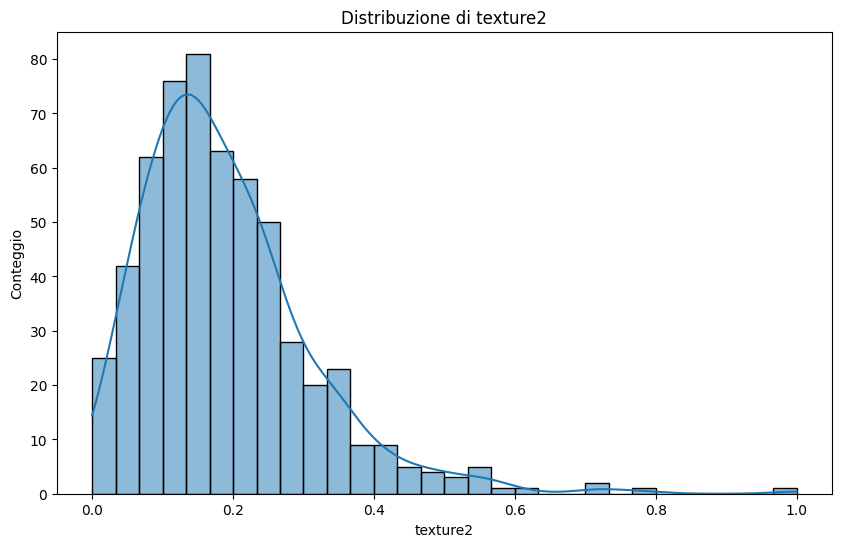

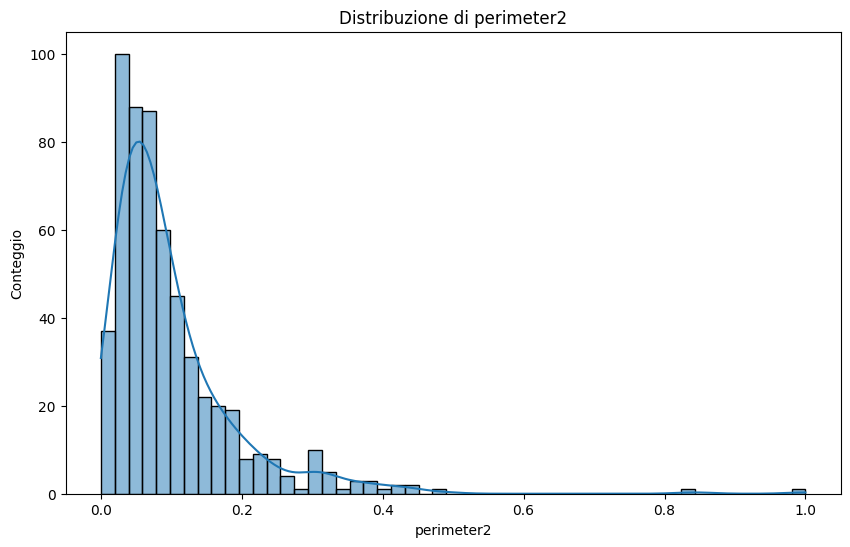

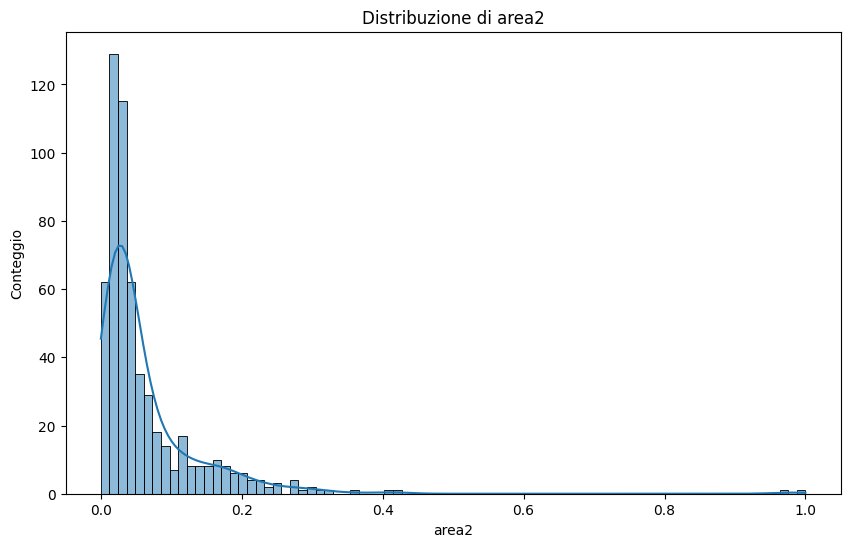

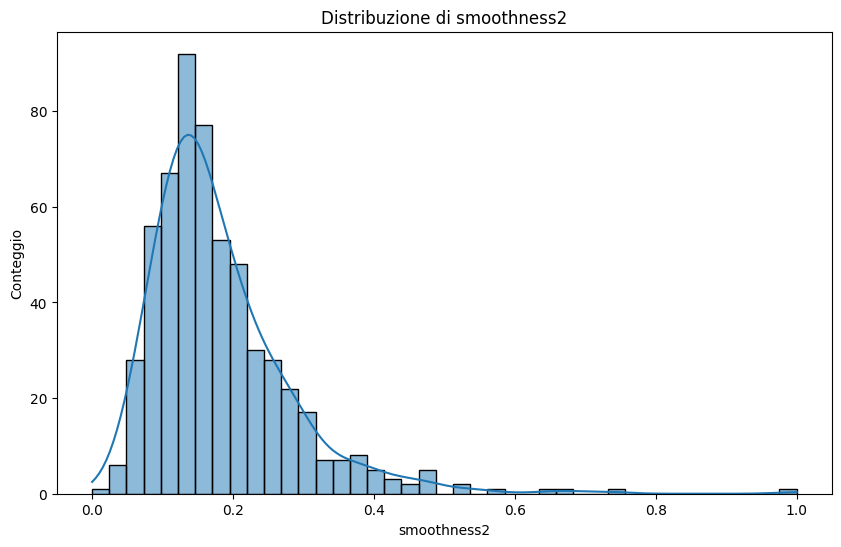

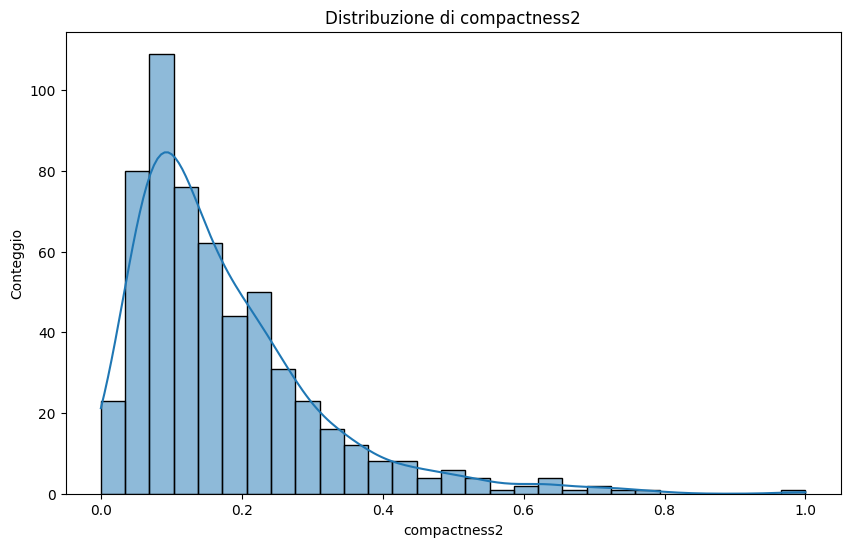

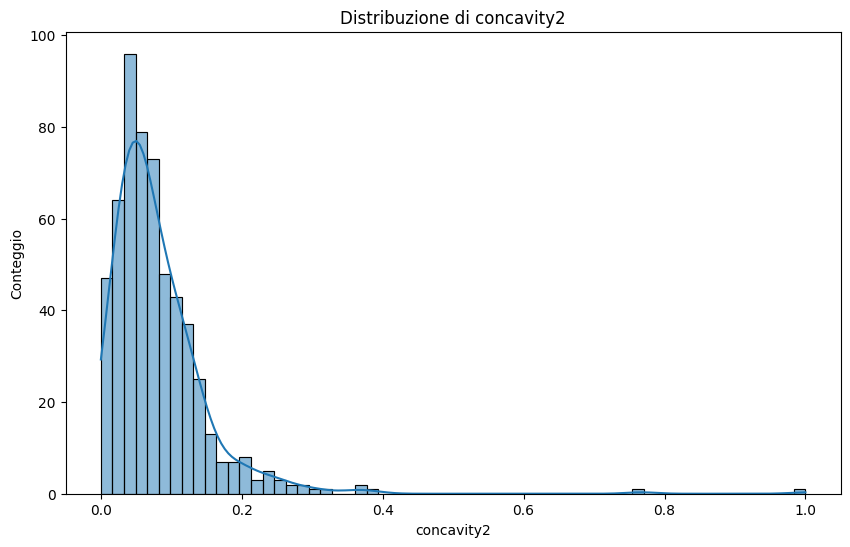

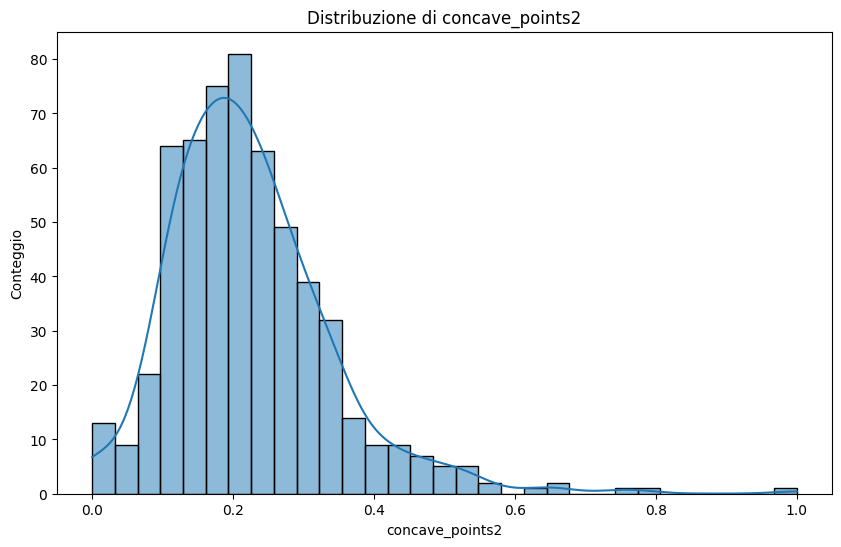

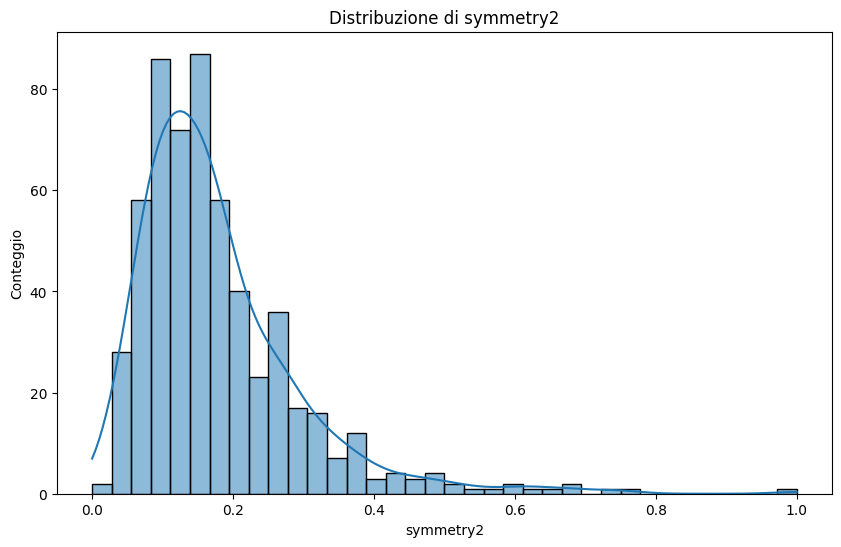

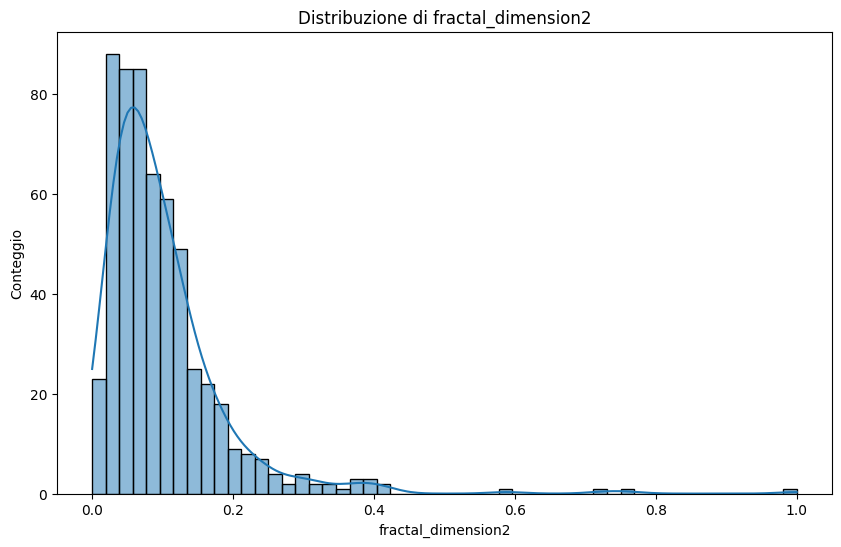

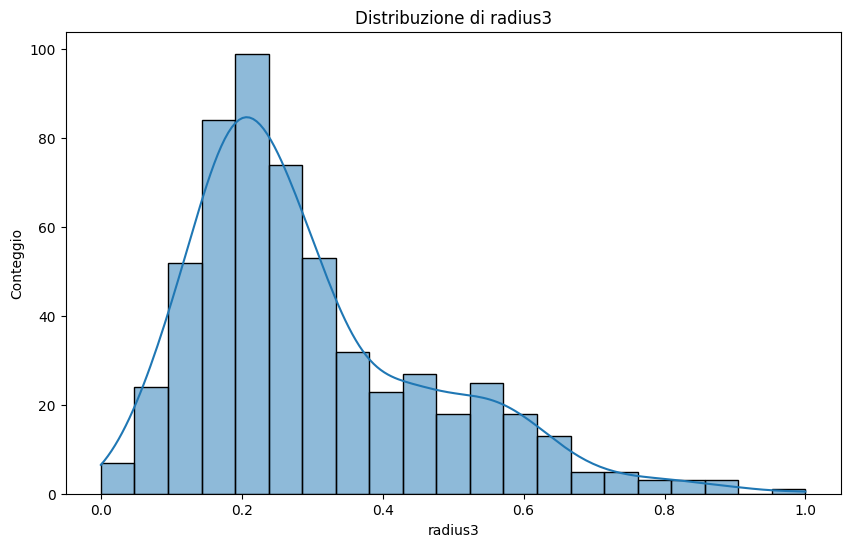

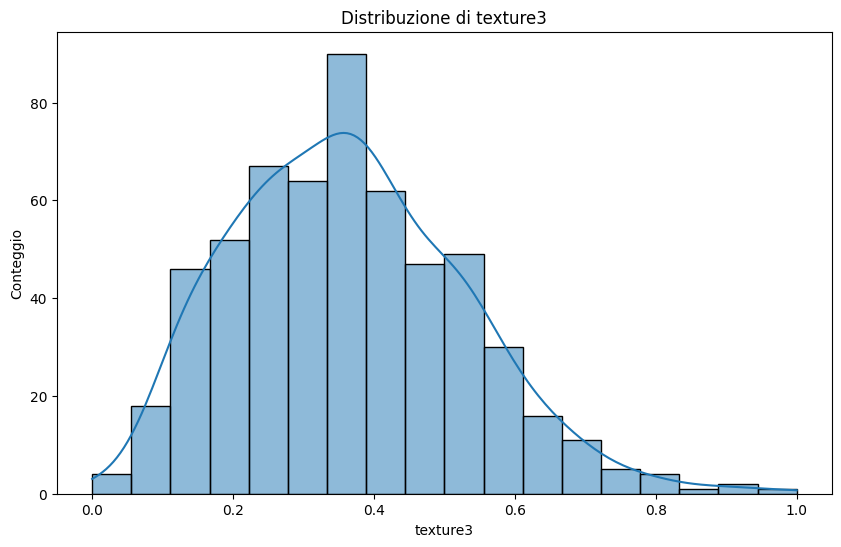

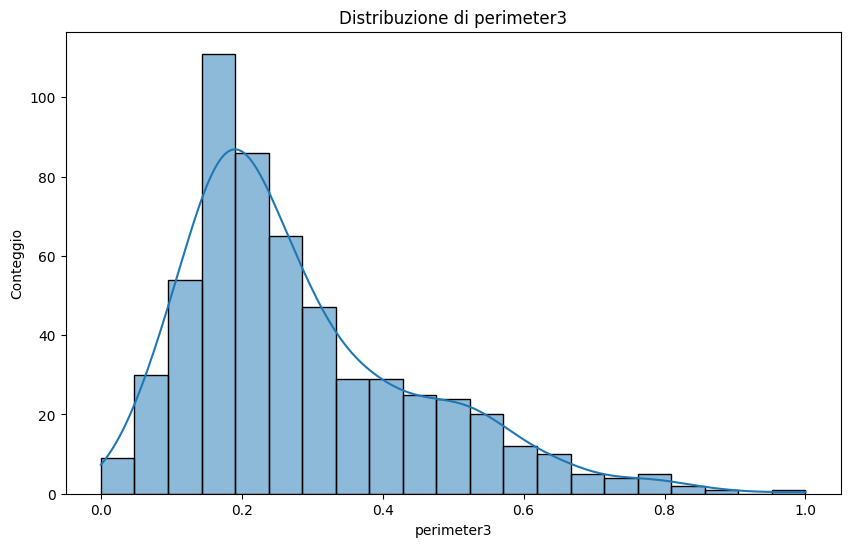

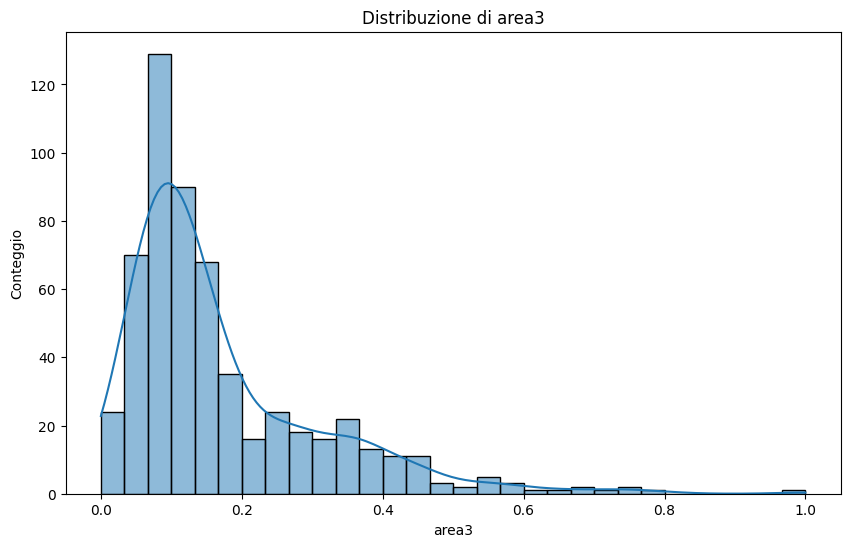

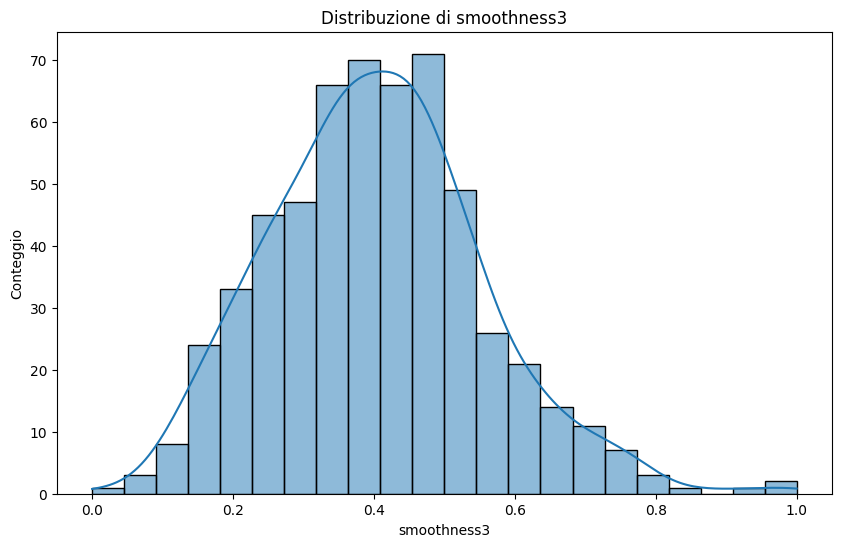

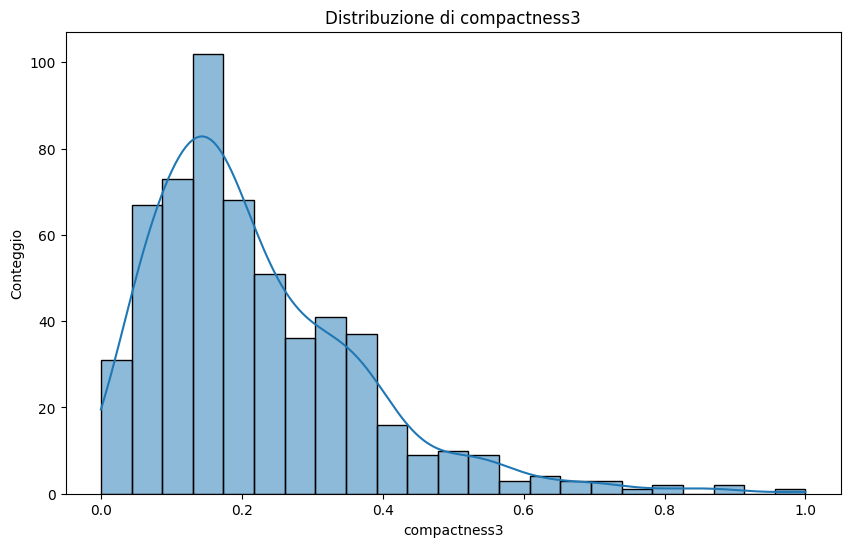

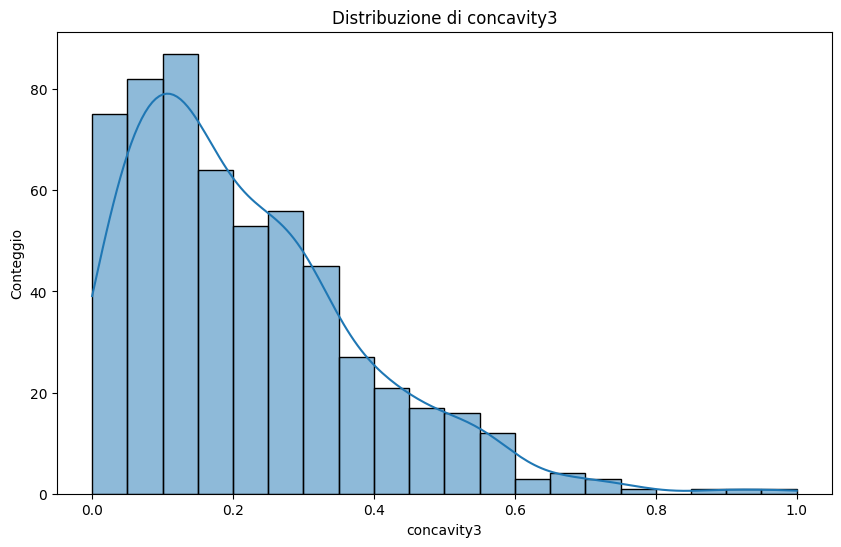

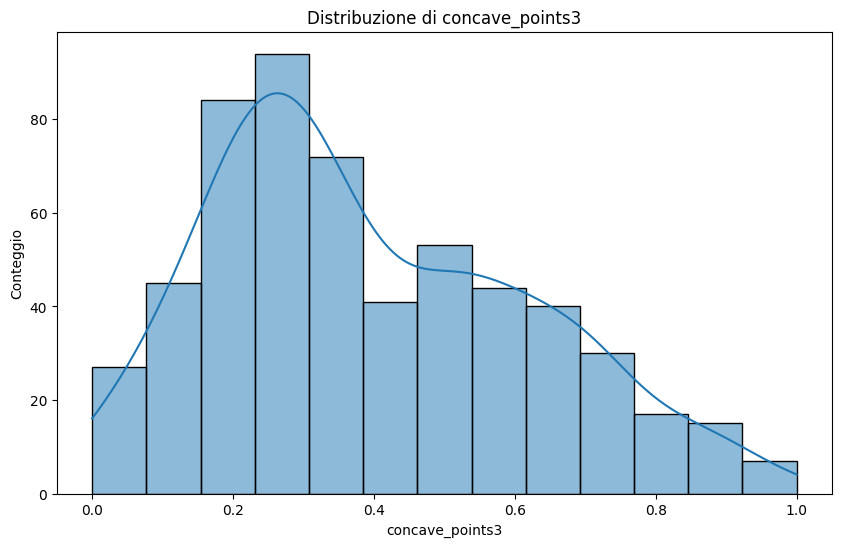

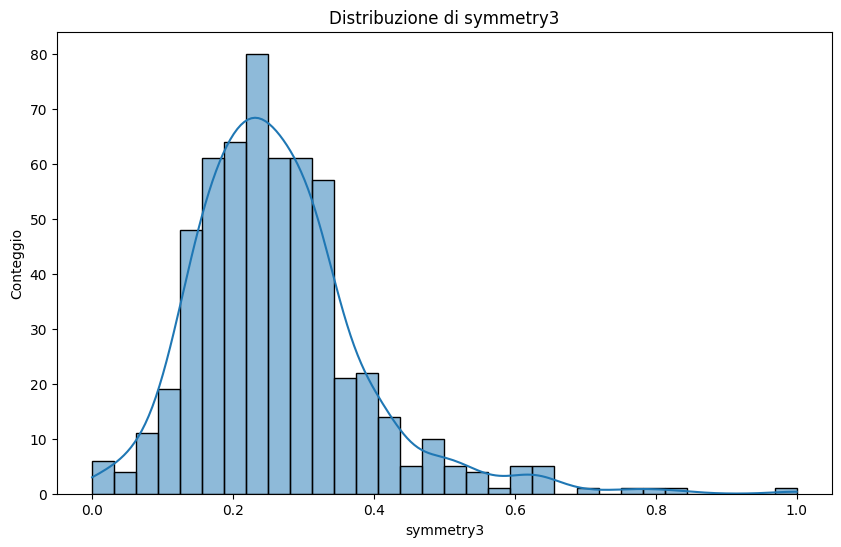

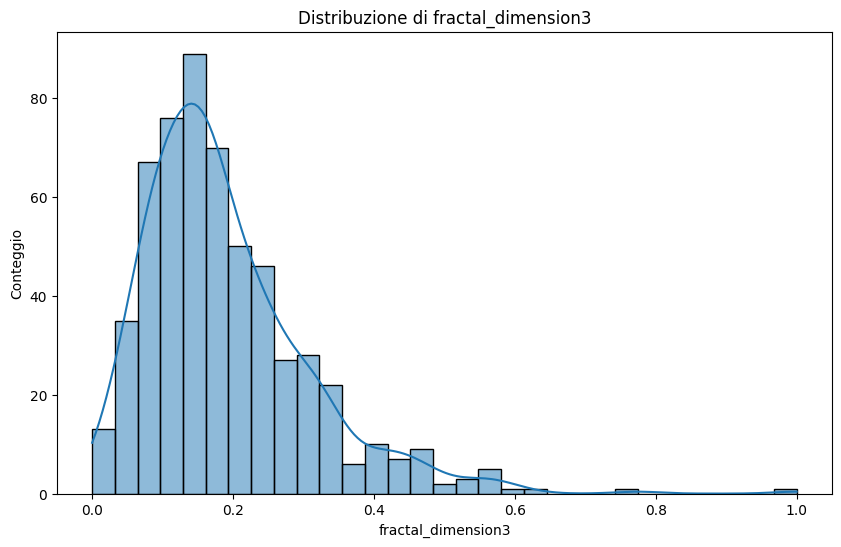


Legenda per l'interpretazione degli indici:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).
# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Code più pronunciate (leptocurtica).
# Kurtosis < 3: Code meno pronunciate (platicurtica).
# CV < 10%: Distribuzione molto bilanciata.
# CV > 50%: Distribuzione altamente sbilanciata.

Tabella riassuntiva degli indici per le feature numeriche:
                        Gini   Kurtosis  Skewness      CV (%)
area2               0.530831  48.767196  5.432816  135.532746
concavity1          0.471188   1.970592  1.397483   89.696328
radius2             0.440991  17.521162  3.080464   94.346376
perimeter2          0.435422  21.203775  3.434530   95.780956
concave_points1     0.424826   1.046680  1.168090   79.250632
concavity3          0.414828   1.590568  1.147202   76.579608
concavity2    

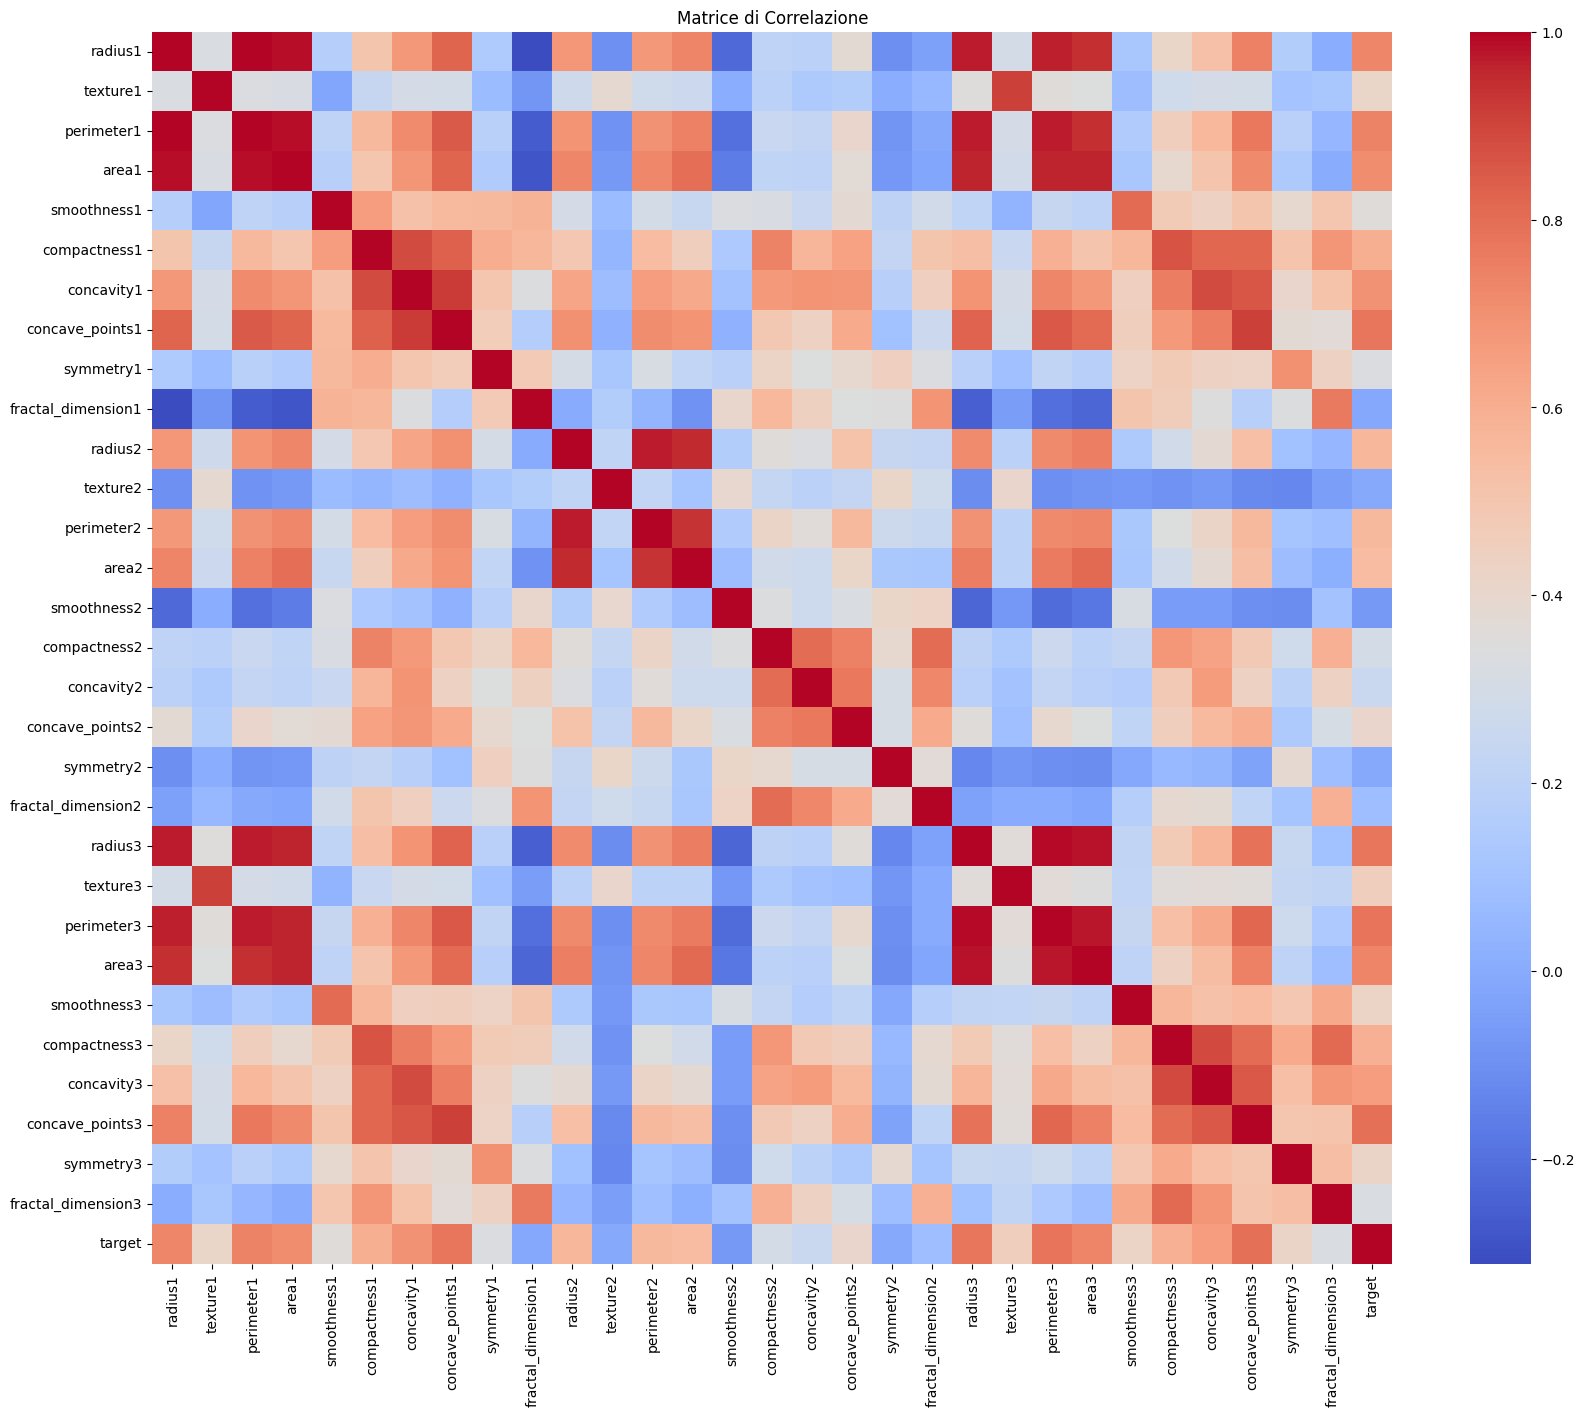

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

df = pd.DataFrame(X, columns=breast_cancer_wisconsin_diagnostic.data.features.columns)
df['target'] = y

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.columns
summary_stats = {}

for col in numerical_columns:
    if col != 'target':  # Escludiamo la colonna target
        data = df[col].dropna().values
        if len(data) > 0:
            summary_stats[col] = {
                'Gini': calculate_gini(data),
                'Kurtosis': kurtosis(data, nan_policy='omit'),
                'Skewness': skew(data, nan_policy='omit'),
                'CV (%)': calculate_cv(data)
            }
            plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).")
print("# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Code più pronunciate (leptocurtica).")
print("# Kurtosis < 3: Code meno pronunciate (platicurtica).")
print("# CV < 10%: Distribuzione molto bilanciata.")
print("# CV > 50%: Distribuzione altamente sbilanciata.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


In [48]:
# Step 1: Importa SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X= X_scaled

# Step 2: Suddividi il dataset in training e test set
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=123456, stratify=y)

# Step 3: Applica SMOTE per bilanciare le classi nel training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Controlla la nuova distribuzione delle classi
from collections import Counter
print("Distribuzione delle classi dopo SMOTE:", Counter(y_train_bal))

# Continua con il training del modello usando i dati bilanciati
# esempio: addestramento di un modello di classificazione
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Valutazione del modello sui dati di test
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

X= X_train_bal
y= y_train_bal

Distribuzione delle classi dopo SMOTE: Counter({0: 250, 1: 250})
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [49]:
num_classes = len(np.unique(y))
print(num_classes)

2


In [ ]:
# # Suddivisione del dataset in train e test
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, shuffle = True, random_state=123456) #maybe change the train size
# X= X_train
# y= y_train
# print(X)
# print(y)

In [9]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, log_loss, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
import time

# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification = []

# Random Forest
start_time_rf = time.time()
clf_rf = RandomForestClassifier(n_jobs=-1)
scores_rf = cross_validate(clf_rf, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Accuracy': scores_rf['test_accuracy'].mean(),
    'Recall': scores_rf['test_recall'].mean(),
    'Precision': scores_rf['test_precision'].mean(),
    'F1 Score': scores_rf['test_f1'].mean(),
    'Log Loss': scores_rf['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
clf_svm = SVC(probability=True)
scores_svm = cross_validate(clf_svm, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification.append({
    'Algorithm': 'SVM',
    'Accuracy': scores_svm['test_accuracy'].mean(),
    'Recall': scores_svm['test_recall'].mean(),
    'Precision': scores_svm['test_precision'].mean(),
    'F1 Score': scores_svm['test_f1'].mean(),
    'Log Loss': scores_svm['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
clf_knn = KNeighborsClassifier()
scores_knn = cross_validate(clf_knn, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification.append({
    'Algorithm': 'KNN',
    'Accuracy': scores_knn['test_accuracy'].mean(),
    'Recall': scores_knn['test_recall'].mean(),
    'Precision': scores_knn['test_precision'].mean(),
    'F1 Score': scores_knn['test_f1'].mean(),
    'Log Loss': scores_knn['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
clf_ann = MLPClassifier(max_iter=500)  # Aggiungi eventuali iperparametri se necessario
scores_ann = cross_validate(clf_ann, X, y, cv=3, scoring=scorers)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification.append({
    'Algorithm': 'ANN',
    'Accuracy': scores_ann['test_accuracy'].mean(),
    'Recall': scores_ann['test_recall'].mean(),
    'Precision': scores_ann['test_precision'].mean(),
    'F1 Score': scores_ann['test_f1'].mean(),
    'Log Loss': scores_ann['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_df_3_fold_classification = pd.DataFrame(results_classification)
print("\nResults for Classification Models (3-Fold Cross-Validation):")
print(results_df_3_fold_classification.to_string(index=False))


[CV] END  accuracy: (test=0.946) f1: (test=0.946) log_loss: (test=0.145) precision: (test=0.946) recall: (test=0.946) total time=   0.3s
[CV] END  accuracy: (test=0.970) f1: (test=0.970) log_loss: (test=0.100) precision: (test=0.970) recall: (test=0.970) total time=   0.3s
[CV] END  accuracy: (test=0.970) f1: (test=0.970) log_loss: (test=0.087) precision: (test=0.970) recall: (test=0.970) total time=   0.3s
[CV] END  accuracy: (test=0.976) f1: (test=0.976) log_loss: (test=0.087) precision: (test=0.977) recall: (test=0.976) total time=   0.0s
[CV] END  accuracy: (test=0.976) f1: (test=0.976) log_loss: (test=0.078) precision: (test=0.976) recall: (test=0.976) total time=   0.0s
[CV] END  accuracy: (test=0.964) f1: (test=0.964) log_loss: (test=0.086) precision: (test=0.964) recall: (test=0.964) total time=   0.0s
[CV] END  accuracy: (test=0.976) f1: (test=0.976) log_loss: (test=0.274) precision: (test=0.977) recall: (test=0.976) total time=   0.0s
[CV] END  accuracy: (test=0.970) f1: (tes

## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [12]:
#about 11 minutes to run the ANN
results_classification_grid_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_grid_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': grid_rf.best_params_,
    'Accuracy': grid_rf.best_score_,
    'Recall': grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_],
    'Precision': grid_rf.cv_results_['mean_test_precision'][grid_rf.best_index_],  # Aggiunta della precision
    'F1 Score': grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_],
    'Log Loss': grid_rf.cv_results_['mean_test_log_loss'][grid_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_grid_search.append({
    'Algorithm': 'SVM',
    'Best Params': grid_svm.best_params_,
    'Accuracy': grid_svm.best_score_,
    'Recall': grid_svm.cv_results_['mean_test_recall'][grid_svm.best_index_],
    'Precision': grid_svm.cv_results_['mean_test_precision'][grid_svm.best_index_],  # Aggiunta della precision
    'F1 Score': grid_svm.cv_results_['mean_test_f1'][grid_svm.best_index_],
    'Log Loss': grid_svm.cv_results_['mean_test_log_loss'][grid_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': [2, 3, 5, 10, 15, 20],
}
clf_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_grid_search.append({
    'Algorithm': 'KNN',
    'Best Params': grid_knn.best_params_,
    'Accuracy': grid_knn.best_score_,
    'Recall': grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_],
    'Precision': grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_],  # Aggiunta della precision
    'F1 Score': grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_],
    'Log Loss': grid_knn.cv_results_['mean_test_log_loss'][grid_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'batch_size': [16, 32],
    'epochs': [20, 50],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh']
}

clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=16, patience=2, verbose=0)
grid_ann = GridSearchCV(clf_ann, ann_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_grid_search.append({
    'Algorithm': 'ANN',
    'Best Params': grid_ann.best_params_,
    'Accuracy': grid_ann.best_score_,
    'Recall': grid_ann.cv_results_['mean_test_recall'][grid_ann.best_index_],
    'Precision': grid_ann.cv_results_['mean_test_precision'][grid_ann.best_index_],  # Aggiunta della precision
    'F1 Score': grid_ann.cv_results_['mean_test_f1'][grid_ann.best_index_],
    'Log Loss': grid_ann.cv_results_['mean_test_log_loss'][grid_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_grid_search = pd.DataFrame(results_classification_grid_search)

print("Results for Grid Search")
print(results_classification_df_grid_search.to_string(index=False))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5649  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4298  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3742 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3151 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2874 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2452  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2556  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2000 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1815 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1841 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1896 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1795 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1905 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1673  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1465 

## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [13]:
results_classification_random_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': sp_randint(10, 100),
    "max_features": sp_randint(1, 64),
    'max_depth': sp_randint(5, 50),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "criterion": ['gini', 'entropy']
}
n_iter_search_rf = 20  # Number of iterations
clf_rf = RandomForestClassifier(random_state=0)
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search_rf, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_random_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': Random_rf.best_params_,
    'Accuracy': Random_rf.best_score_,
    'Recall': Random_rf.cv_results_['mean_test_recall'][Random_rf.best_index_],
    'Precision': Random_rf.cv_results_['mean_test_precision'][Random_rf.best_index_],  # Aggiunta della precision
    'F1 Score': Random_rf.cv_results_['mean_test_f1'][Random_rf.best_index_],
    'Log Loss': Random_rf.cv_results_['mean_test_log_loss'][Random_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': stats.uniform(0, 50),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
n_iter_search_svm = 20
clf_svm = SVC(gamma='scale', probability=True)
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search_svm, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_random_search.append({
    'Algorithm': 'SVM',
    'Best Params': Random_svm.best_params_,
    'Accuracy': Random_svm.best_score_,
    'Recall': Random_svm.cv_results_['mean_test_recall'][Random_svm.best_index_],
    'Precision': Random_svm.cv_results_['mean_test_precision'][Random_svm.best_index_],  # Aggiunta della precision
    'F1 Score': Random_svm.cv_results_['mean_test_f1'][Random_svm.best_index_],
    'Log Loss': Random_svm.cv_results_['mean_test_log_loss'][Random_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': range(1, 20),
}
n_iter_search_knn = 10
clf_knn = KNeighborsClassifier()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search_knn, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_random_search.append({
    'Algorithm': 'KNN',
    'Best Params': Random_knn.best_params_,
    'Accuracy': Random_knn.best_score_,
    'Recall': Random_knn.cv_results_['mean_test_recall'][Random_knn.best_index_],
    'Precision': Random_knn.cv_results_['mean_test_precision'][Random_knn.best_index_],  # Aggiunta della precision
    'F1 Score': Random_knn.cv_results_['mean_test_f1'][Random_knn.best_index_],
    'Log Loss': Random_knn.cv_results_['mean_test_log_loss'][Random_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search_ann = 10
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search_ann, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_random_search.append({
    'Algorithm': 'ANN',
    'Best Params': Random_ann.best_params_,
    'Accuracy': Random_ann.best_score_,
    'Recall': Random_ann.cv_results_['mean_test_recall'][Random_ann.best_index_],
    'Precision': Random_ann.cv_results_['mean_test_precision'][Random_ann.best_index_],  # Aggiunta della precision
    'F1 Score': Random_ann.cv_results_['mean_test_f1'][Random_ann.best_index_],
    'Log Loss': Random_ann.cv_results_['mean_test_log_loss'][Random_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_random_search = pd.DataFrame(results_classification_random_search)

print("Results for Random Search")
print(results_classification_df_random_search.to_string(index=False))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6433  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2678 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1993 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1581 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1382 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1327 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1002 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0895 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1085  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1086 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0914 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0931 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0902 
Ep

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5756  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3707  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2833  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2289  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2071  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1849 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1564  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1610 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1391 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1420 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1238  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1392  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1111  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1205 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0969  
Epoch

## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [14]:
results_classification_bo = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': Integer(10, 100),
    "max_features": Integer(1, 64),
    'max_depth': Integer(5, 50),
    "min_samples_split": Integer(2, 11),
    "min_samples_leaf": Integer(1, 11),
    "criterion": ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
with parallel_backend('threading'):
    Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_bo.append({
    'Algorithm': 'Random Forest',
    'Best Params': Bayes_rf.best_params_,
    'Accuracy': Bayes_rf.best_score_,
    'Recall': Bayes_rf.cv_results_['mean_test_recall'][Bayes_rf.best_index_],
    'Precision': Bayes_rf.cv_results_['mean_test_precision'][Bayes_rf.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_rf.cv_results_['mean_test_f1'][Bayes_rf.best_index_],
    'Log Loss': Bayes_rf.cv_results_['mean_test_log_loss'][Bayes_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': Real(0.01, 50),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
with parallel_backend('threading'):
    Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_bo.append({
    'Algorithm': 'SVM',
    'Best Params': Bayes_svm.best_params_,
    'Accuracy': Bayes_svm.best_score_,
    'Recall': Bayes_svm.cv_results_['mean_test_recall'][Bayes_svm.best_index_],
    'Precision': Bayes_svm.cv_results_['mean_test_precision'][Bayes_svm.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_svm.cv_results_['mean_test_f1'][Bayes_svm.best_index_],
    'Log Loss': Bayes_svm.cv_results_['mean_test_log_loss'][Bayes_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsClassifier()
with parallel_backend('threading'):
    Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_bo.append({
    'Algorithm': 'KNN',
    'Best Params': Bayes_knn.best_params_,
    'Accuracy': Bayes_knn.best_score_,
    'Recall': Bayes_knn.cv_results_['mean_test_recall'][Bayes_knn.best_index_],
    'Precision': Bayes_knn.cv_results_['mean_test_precision'][Bayes_knn.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_knn.cv_results_['mean_test_f1'][Bayes_knn.best_index_],
    'Log Loss': Bayes_knn.cv_results_['mean_test_log_loss'][Bayes_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
with parallel_backend('threading'):
    Bayes_ann = BayesSearchCV(clf_ann, ann_params, cv=3, n_iter=10, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_bo.append({
    'Algorithm': 'ANN',
    'Best Params': Bayes_ann.best_params_,
    'Accuracy': Bayes_ann.best_score_,
    'Recall': Bayes_ann.cv_results_['mean_test_recall'][Bayes_ann.best_index_],
    'Precision': Bayes_ann.cv_results_['mean_test_precision'][Bayes_ann.best_index_],  # Aggiunta della precision
    'F1 Score': Bayes_ann.cv_results_['mean_test_f1'][Bayes_ann.best_index_],
    'Log Loss': Bayes_ann.cv_results_['mean_test_log_loss'][Bayes_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_bo = pd.DataFrame(results_classification_bo)

print("Results for Bayesian Optimization")
print(results_classification_df_bo.to_string(index=False))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6059  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4544 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3708 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3205 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2599 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2432 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2022 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2040 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1753  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1941  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1647 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1680 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1547 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1643 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1508 
E

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4627  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3498 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2803 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2350 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2192 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1757 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1687 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1564 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1555 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1455 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1188 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1336 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1208 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1265 
Epoch 16/20
16

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6424  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4607 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3645 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2619 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2266 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1780  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1772 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1646 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1508 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1383 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1419  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1492  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1268  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1234 

### Using skopt.gp_minimize

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from skopt import gp_minimize
from skopt.space import Integer, Real, Categorical
from joblib import parallel_backend

results_classification_skopt_gp_minimize = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='accuracy').mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='recall'))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='f1'))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='precision'))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='neg_log_loss'))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Random Forest
start_time_rf = time.time()
reg_rf = RandomForestClassifier()

space_rf = [
    Integer(10, 100, name='n_estimators'),
    Integer(5, 50, name='max_depth'),
    Integer(1, 64, name='max_features'),
    Integer(2, 11, name='min_samples_split'),
    Integer(1, 11, name='min_samples_leaf'),
    Categorical(['gini', 'entropy'], name='criterion'),
]

@use_named_args(space_rf)
def objective_rf(**params):
    reg_rf.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_rf, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=20, random_state=0)

elapsed_time_rf = time.time() - start_time_rf
# Rebuild the model with the best parameters
best_rf = RandomForestClassifier(**dict(zip([dim.name for dim in space_rf], res_gp_rf.x)))
best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'Random Forest',
    'Best Params': dict(zip([dim.name for dim in space_rf], res_gp_rf.x)),
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm
# Rebuild the model with the best parameters
best_svm = SVC(**dict(zip([dim.name for dim in space_svm], res_gp_svm.x)), probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'SVM',
    'Best Params': dict(zip([dim.name for dim in space_svm], res_gp_svm.x)),
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
reg_knn = KNeighborsClassifier()

space_knn = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space_knn)
def objective_knn(**params):
    reg_knn.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_knn, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_knn = gp_minimize(objective_knn, space_knn, n_calls=10, random_state=0)

elapsed_time_knn = time.time() - start_time_knn
# Rebuild the model with the best parameters
best_knn = KNeighborsClassifier(**dict(zip([dim.name for dim in space_knn], res_gp_knn.x)))
best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'KNN',
    'Best Params': dict(zip([dim.name for dim in space_knn], res_gp_knn.x)),
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
space_ann = [
    Categorical(['lbfgs', 'adam', 'sgd'], name='optimizer'),
    Categorical(['relu', 'tanh'], name='activation'),
    Integer(10, 100, name='neurons'),
    Integer(3, 20, name='patience'),
    Integer(16, 64, name='batch_size'),
    Categorical([20, 50], name='epochs'),
]

@use_named_args(space_ann)
def objective_ann(optimizer, activation, neurons, patience, batch_size, epochs):
    model = MLPClassifier(
        hidden_layer_sizes=(neurons,),
        activation=activation,
        solver=optimizer,
        batch_size=batch_size,
        max_iter=epochs,
        early_stopping=True,
        n_iter_no_change=patience,
        random_state=42
    )
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(model, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_ann = gp_minimize(objective_ann, space_ann, n_calls=20, random_state=42, verbose=0)

elapsed_time_ann = time.time() - start_time_ann
# Rebuild the model with the best parameters
best_ann = MLPClassifier(
    hidden_layer_sizes=(res_gp_ann.x[2],),
    activation=res_gp_ann.x[1],
    solver=res_gp_ann.x[0],
    batch_size=res_gp_ann.x[4],
    max_iter=res_gp_ann.x[5],
    early_stopping=True,
    n_iter_no_change=res_gp_ann.x[3],
    random_state=42
)
best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'ANN',
    'Best Params': dict(zip([dim.name for dim in space_ann], res_gp_ann.x)),
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_skopt_gp_minimize = pd.DataFrame(results_classification_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_classification_df_skopt_gp_minimize.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [39.12826248692367, 'rbf']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [12.671579506200485, 'sigmoid']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [35.20409742263628, 'linear']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [50.0, 'rbf'] before, using random point [19.35984028408739, 'poly']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer:

Results for skopt.gp_minimize
    Algorithm                                                                                                                   Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 47, 'max_depth': 47, 'max_features': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}  0.956016 0.967967   0.953356  0.960123  0.174520         54.740749
          SVM                                                                                    {'C': 19.35984028408739, 'kernel': 'poly'}  0.974040 0.952142   0.996032  0.973159  0.107563          9.887891
          KNN                                                                                                            {'n_neighbors': 2}  0.970024 0.944014   0.995935  0.969039  0.318703          1.732438
          ANN                   {'optimizer': 'lbfgs', 'activation': 'relu', 'neurons': 19, 'patience': 20, 'batch_size': 59, 'epochs': 20

## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [16]:
results_classification_bo_tpe = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='accuracy').mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='recall'))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='precision'))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='f1'))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring='neg_log_loss'))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Objective function for Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

# Define search space for Random Forest
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    'max_features': hp.quniform('max_features', 1, 64, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)

best_params_rf = space_eval(space_rf, best_rf)
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params_rf['n_estimators']),
    max_depth=int(best_params_rf['max_depth']),
    max_features=int(best_params_rf['max_features']),
    min_samples_split=int(best_params_rf['min_samples_split']),
    min_samples_leaf=int(best_params_rf['min_samples_leaf']),
    criterion=str(best_params_rf['criterion'])
)

best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# Objective function for SVM
def objective_svm(params):
    params = {
        'C': params['C'],
        'kernel': str(params['kernel'])
    }
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_svm = {
    'C': hp.uniform('C', 0.01, 50),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
}

start_time_svm = time.time()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=20)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

best_params_svm = space_eval(space_svm, best_svm)
best_svm_model = SVC(**best_params_svm, gamma='scale', probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# Objective function for KNN
def objective_knn(params):
    params = {
        'n_neighbors': int(params['n_neighbors'])
    }
    clf = KNeighborsClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1)
}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)

best_params_knn = space_eval(space_knn, best_knn)
best_knn_model = KNeighborsClassifier(
    n_neighbors=int(best_params_knn['n_neighbors'])
)

best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# Objective function for ANN
def objective_ann(params):
    clf = KerasClassifier(build_fn=ANN,
                          optimizer=str(params['optimizer']),
                          activation=str(params['activation']),
                          loss=str(params['loss']),
                          batch_size=int(params['batch_size']),
                          epochs=int(params['epochs']),
                          verbose=0)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['sparse_categorical_crossentropy']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=10)
elapsed_time_ann = round(time.time() - start_time, 2)

best_params_ann = space_eval(space_ann, best_ann)
best_ann_model = KerasClassifier(build_fn=ANN,
                                 optimizer=str(best_params_ann['optimizer']),
                                 activation=str(best_params_ann['activation']),
                                 loss=str(best_params_ann['loss']),
                                 batch_size=int(best_params_ann['batch_size']),
                                 epochs=int(best_params_ann['epochs']),
                                 verbose=0)

best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann_model, X, y)

results_classification_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti l'array in un DataFrame
results_classification_df_bo_tpe = pd.DataFrame(results_classification_bo_tpe)
print("Results for Bayesian Optimization with TPE")
print(results_classification_df_bo_tpe.to_string(index=False))

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



100%|██████████| 10/10 [08:14<00:00, 49.43s/trial, best loss: -3.9901580497700353]
Results for Bayesian Optimization with TPE
    Algorithm                                                                                                                                                      Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                       {'criterion': 'entropy', 'max_depth': 48.0, 'max_features': 33.0, 'min_samples_leaf': 3.0, 'min_samples_split': 3.0, 'n_estimators': 23.0}  0.954020 0.959983   0.956212  0.957930  0.181956             68.52
          SVM                                                                                                                       {'C': 45.336565693525074, 'kernel': 'rbf'}  0.977984 0.984031   0.972980  0.978205  0.083469              5.92
          KNN                                                                                                                                    

## HPO Algorithm 5: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [50]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from scikeras.wrappers import KerasClassifier
import optunity
import optunity.metrics
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

results_classification_pso = []
data = X
labels = y.tolist()

# Codifica delle etichette
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Da etichette a valori interi
y_categorical = to_categorical(y_encoded)  # One-hot encoding

# Definisci gli scorers con precisione aggiunta
scorers = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'log_loss': make_scorer(log_loss, labels=np.unique(y_encoded), response_method='predict_proba')
}

# Funzione di performance Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
    "criterion": [0, 1]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None, criterion=None):
    cri = 'gini' if criterion < 0.5 else 'entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_rf = time.time()
optimal_configuration_rf, info_rf, _ = optunity.maximize(performance_rf, solver_name='particle swarm', num_evals=20, **search_rf)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
accuracy_rf = info_rf.optimum

# Recupera tutte le metriche per Random Forest
cri = 'gini' if optimal_configuration_rf['criterion'] < 0.5 else 'entropy'
rf_model = RandomForestClassifier(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                  max_features=int(optimal_configuration_rf['max_features']),
                                  max_depth=int(optimal_configuration_rf['max_depth']),
                                  min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                  min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']),
                                  criterion=cri)
rf_scores = cross_validate(rf_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'Random Forest',
    'Best Params': optimal_configuration_rf,
    'Accuracy': np.mean(rf_scores['test_accuracy']),
    'Recall': np.mean(rf_scores['test_recall']),
    'Precision': np.mean(rf_scores['test_precision']),
    'F1 Score': np.mean(rf_scores['test_f1']),
    'Log Loss': np.mean(rf_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_rf
})

# Funzione di performance per SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 4]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None):
    ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(kernel)]
    model = SVC(C=float(C), kernel=ke, probability=True)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_svm = time.time()
optimal_configuration_svm, info_svm, _ = optunity.maximize(performance_svm, solver_name='particle swarm', num_evals=20, **search_svm)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
accuracy_svm = info_svm.optimum

# Recupera tutte le metriche per SVM
ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(optimal_configuration_svm['kernel'])]
svm_model = SVC(C=float(optimal_configuration_svm['C']), kernel=ke, probability=True)
svm_scores = cross_validate(svm_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'SVM',
    'Best Params': optimal_configuration_svm,
    'Accuracy': np.mean(svm_scores['test_accuracy']),
    'Recall': np.mean(svm_scores['test_recall']),
    'Precision': np.mean(svm_scores['test_precision']),
    'F1 Score': np.mean(svm_scores['test_f1']),
    'Log Loss': np.mean(svm_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_svm
})

# Funzione di performance per KNN
search_knn = {
    'n_neighbors': [1, 20],
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_knn = time.time()
optimal_configuration_knn, info_knn, _ = optunity.maximize(performance_knn, solver_name='particle swarm', num_evals=10, **search_knn)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
accuracy_knn = info_knn.optimum

# Recupera tutte le metriche per KNN
knn_model = KNeighborsClassifier(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
knn_scores = cross_validate(knn_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'KNN',
    'Best Params': optimal_configuration_knn,
    'Accuracy': np.mean(knn_scores['test_accuracy']),
    'Recall': np.mean(knn_scores['test_recall']),
    'Precision': np.mean(knn_scores['test_precision']),
    'F1 Score': np.mean(knn_scores['test_f1']),
    'Log Loss': np.mean(knn_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_knn
})

# Funzione per creare il modello ANN
def create_ann_model(neurons=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation=activation))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

# Mappatura degli ottimizzatori
def map_optimizer(optimizer_value):
    if optimizer_value < 1:
        return 'adam'
    elif optimizer_value < 2:
        return 'sgd'
    elif optimizer_value < 3:
        return 'rmsprop'
    else:
        return 'adagrad'

# Definizione dello spazio di ricerca per ANN
search_ann = {
    'optimizer': [0, 3],
    'activation': [0, 2],
    'batch_size': [0, 2],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

# Funzione di performance per ANN
@optunity.cross_validated(x=X, y=y_encoded, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, batch_size=None, neurons=None, epochs=None, patience=None):
    op = map_optimizer(optimizer)
    ac = 'relu' if activation < 1 else 'tanh'
    ba = 16 if batch_size < 1 else 32

    model = KerasClassifier(model=create_ann_model, optimizer=op, activation=ac, neurons=int(neurons), epochs=int(epochs), batch_size=ba, verbose=0)
    scores = cross_validate(model, X, y_encoded, cv=3, scoring=scorers, n_jobs=-1)
    return np.mean(scores['test_accuracy'])

# Ottimizzazione PSO per ANN
start_time_ann = time.time()
optimal_configuration_ann, info_ann, _ = optunity.maximize(performance_ann, solver_name='particle swarm', num_evals=20, **search_ann)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
accuracy_ann = info_ann.optimum

# Recupera tutte le metriche per ANN
ann_model = KerasClassifier(model=create_ann_model,
                            optimizer=map_optimizer(optimal_configuration_ann['optimizer']),
                            activation='relu' if optimal_configuration_ann['activation'] < 1 else 'tanh',
                            neurons=int(optimal_configuration_ann['neurons']),
                            epochs=int(optimal_configuration_ann['epochs']),
                            batch_size=16 if optimal_configuration_ann['batch_size'] < 1 else 32,
                            verbose=0)
ann_scores = cross_validate(ann_model, X, y_encoded, cv=3, scoring=scorers, n_jobs=-1)

results_classification_pso.append({
    'Algorithm': 'ANN',
    'Best Params': optimal_configuration_ann,
    'Accuracy': np.mean(ann_scores['test_accuracy']),
    'Recall': np.mean(ann_scores['test_recall']),
    'Precision': np.mean(ann_scores['test_precision']),
    'F1 Score': np.mean(ann_scores['test_f1']),
    'Log Loss': np.mean(ann_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione
results_classification_df_pso = pd.DataFrame(results_classification_pso)
print("Results for Particle Swarm Optimization")
print(results_classification_df_pso.to_string(index=False))

Results for Particle Swarm Optimization
    Algorithm                                                                                                                                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 53.5498046875, 'max_features': 43.78955078125, 'max_depth': 29.45556640625, 'min_samples_split': 8.93017578125, 'min_samples_leaf': 2.0595703125, 'criterion': 0.79443359375}  0.958000 0.958000   0.958980  0.957972  0.174516             40.16
          SVM                                                                                                                                               {'C': 14.142154861277513, 'kernel': 2.249609375}  0.979992 0.979992   0.980407  0.979987  0.070398              4.31
          KNN                                                                                                                                

### Using DEAP

### Using TPOT

In [51]:
# Definizione degli scorer
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted')
}

def safe_log_loss(y_true, y_pred):
    try:
        return log_loss(y_true, y_pred)
    except AttributeError:
        # Se il modello non ha predict_proba, restituisci NaN
        return np.nan

scorers['log_loss'] = make_scorer(safe_log_loss, needs_proba=True, greater_is_better=False)

# Funzione per calcolare le metriche in modo sicuro
def safe_cross_validate(estimator, X, y):
    try:
        # Se il modello ha predict_proba, usiamolo
        if hasattr(estimator, 'predict_proba'):
            estimator.predict_proba
        scores = cross_validate(estimator, X, y, cv=3, scoring=scorers)
        return {
            'accuracy': np.mean(scores['test_accuracy']),
            'recall': np.mean(scores['test_recall']),
            'f1': np.mean(scores['test_f1']),
            'precision': np.mean(scores['test_precision']),
            'log_loss': np.mean(scores['test_log_loss']) if not np.isnan(scores['test_log_loss']).all() else 'N/A'
        }
    except Exception as e:
        print(f"Error in cross-validation: {e}")
        return {
            'accuracy': estimator.score(X, y),
            'recall': 'N/A',
            'f1': 'N/A',
            'precision': 'N/A',
            'log_loss': 'N/A'
        }

results_classification = []

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    'max_features': range(1, 64),
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}

start_time_rf = time.time()
ga2_rf = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                        verbosity=1, early_stop=5,
                        config_dict={'sklearn.ensemble.RandomForestClassifier': parameters_rf},
                        cv=3, scoring='accuracy')

ga2_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)

# Calcolo di tutte le metriche per Random Forest
rf_scores = safe_cross_validate(ga2_rf.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': ga2_rf.fitted_pipeline_,
    'Accuracy': rf_scores['accuracy'],
    'Recall': rf_scores['recall'],
    'Precision': rf_scores['precision'],
    'F1 Score': rf_scores['f1'],
    'Log Loss': -rf_scores['log_loss'] if rf_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability': [True]
}

start_time_svm = time.time()
ga2_svm = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.svm.SVC': parameters_svm},
                         cv=3, scoring='accuracy')
ga2_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

# Calcolo di tutte le metriche per SVM
svm_scores = safe_cross_validate(ga2_svm.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': ga2_svm.fitted_pipeline_,
    'Accuracy': svm_scores['accuracy'],
    'Recall': svm_scores['recall'],
    'Precision': svm_scores['precision'],
    'F1 Score': svm_scores['f1'],
    'Log Loss': -svm_scores['log_loss'] if svm_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time_knn = time.time()
ga2_knn = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.neighbors.KNeighborsClassifier': parameters_knn},
                         cv=3, scoring='accuracy')
ga2_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)

# Calcolo di tutte le metriche per KNN
knn_scores = safe_cross_validate(ga2_knn.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': ga2_knn.fitted_pipeline_,
    'Accuracy': knn_scores['accuracy'],
    'Recall': knn_scores['recall'],
    'Precision': knn_scores['precision'],
    'F1 Score': knn_scores['f1'],
    'Log Loss': -knn_scores['log_loss'] if knn_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
nn_parameters = {
    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

start_time_ann = time.time()
tpot_ann = TPOTClassifier(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=1,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='accuracy'
)

tpot_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)

# Calcolo di tutte le metriche per ANN
ann_scores = safe_cross_validate(tpot_ann.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': tpot_ann.fitted_pipeline_,
    'Accuracy': ann_scores['accuracy'],
    'Recall': ann_scores['recall'],
    'Precision': ann_scores['precision'],
    'F1 Score': ann_scores['f1'],
    'Log Loss': -ann_scores['log_loss'] if ann_scores['log_loss'] != 'N/A' else 'N/A',
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame con i risultati
results_classification_df_tpot = pd.DataFrame(results_classification)
print("Results for TPOT")
print(results_classification_df_tpot.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=51, max_features=18, min_samples_leaf=3, min_samples_split=3, n_estimators=97)
Best pipeline: SVC(CombineDFs(input_matrix, input_matrix), C=42.7302233102253, kernel=rbf, probability=True)
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3)
Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam), activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Results for TPOT
    Algorithm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold_classification, '/content/results_3_fold_classification.csv'),
    (results_classification_df_grid_search, '/content/results_classification_grid_search.csv'),
    (results_classification_df_random_search, '/content/results_classification_random_search.csv'),
    (results_classification_df_bo, '/content/results_classification_bo.csv'),
    (results_classification_df_skopt_gp_minimize, '/content/results_classification_skopt_gp_minimize.csv'),
    (results_classification_df_bo_tpe, '/content/results_classification_bo_tpe.csv'),
    (results_classification_df_pso, '/content/results_classification_pso.csv'),
    (results_classification_df_tpot, '/content/results_classification_tpot.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [53]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate",
    "ucimlrepo",
    "optuna-integration",
    "git+https://github.com/optuna/optuna.git"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=d6224b8ad2a0ec3fc87e6fad2a3099edcf786058cab3092cc160b083d1608a15
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.2 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import warnings
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
import optuna
from random import randint, randrange as sp_randrange
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, log_loss, mean_absolute_error, precision_score, make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.validation import check_is_fitted
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from skopt import Optimizer, BayesSearchCV, gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hpbandster_sklearn import HpBandSterSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from optuna.integration import KerasPruningCallback
from tabulate import tabulate
from colorama import Fore, Style
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from optuna.pruners import HyperbandPruner
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

2024-11-17 19:01:14.226040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 19:01:14.271803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 19:01:14.286136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 19:01:14.317800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-17 19:01:17.312739: W tensorflow/compiler/tf2

In [2]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

print(X.columns)
print(y)
y = LabelEncoder().fit_transform(y.values.ravel())
print(y)

#X = X.drop(columns=['ID'])
X= MinMaxScaler().fit_transform(X)

print(X)
print(y)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
# Step 1: Importa SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X= X_scaled

# Step 2: Suddividi il dataset in training e test set
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=123456, stratify=y)

# Step 3: Applica SMOTE per bilanciare le classi nel training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Controlla la nuova distribuzione delle classi
from collections import Counter
print("Distribuzione delle classi dopo SMOTE:", Counter(y_train_bal))

# Continua con il training del modello usando i dati bilanciati
# esempio: addestramento di un modello di classificazione
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Valutazione del modello sui dati di test
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

X= X_train_bal
y= y_train_bal

Distribuzione delle classi dopo SMOTE: Counter({0: 250, 1: 250})
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [4]:
# # Suddivisione del dataset in train e test
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, shuffle = True, random_state=123456) #maybe change the train size
# X= X_train
# y= y_train
# print(X)
# print(y)

In [5]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

In [6]:
# Lista per memorizzare i risultati delle classificazioni
results_classification = []

# Random Forest
start_time_rf = time.time()
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_int('max_features', 1, X.shape[1])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_rf = HyperbandPruner(min_resource=1, max_resource=100, reduction_factor=3)
study_rf = optuna.create_study(direction='maximize', pruner=pruner_rf)
study_rf.optimize(objective_rf, n_trials=50)

best_params_rf = study_rf.best_params

clf_final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
clf_final_rf.fit(X, y)
elapsed_time_rf = time.time() - start_time_rf

y_pred_rf = clf_final_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
log_loss_rf = log_loss(y_test, clf_final_rf.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
def objective_svm(trial):
    C = trial.suggest_float('C', 0.01, 50.0, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(
        C=C,
        kernel=kernel,
        gamma='scale',
        probability=True,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_svm = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_svm = optuna.create_study(direction='maximize', pruner=pruner_svm)
study_svm.optimize(objective_svm, n_trials=50)

best_params_svm = study_svm.best_params

clf_final_svm = SVC(**best_params_svm, gamma='scale', probability=True, random_state=123456)
clf_final_svm.fit(X, y)
elapsed_time_svm = time.time() - start_time_svm

y_pred_svm = clf_final_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
log_loss_svm = log_loss(y_test, clf_final_svm.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_knn = HyperbandPruner(min_resource=1, max_resource=20, reduction_factor=3)
study_knn = optuna.create_study(direction='maximize', pruner=pruner_knn)
study_knn.optimize(objective_knn, n_trials=50)

best_params_knn = study_knn.best_params

clf_final_knn = KNeighborsClassifier(**best_params_knn)
clf_final_knn.fit(X, y)
elapsed_time_knn = time.time() - start_time_knn

y_pred_knn = clf_final_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
log_loss_knn = log_loss(y_test, clf_final_knn.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
def objective_ann(trial):
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    neurons = trial.suggest_int('neurons', 10, 100)
    epochs = trial.suggest_categorical('epochs', [20, 50])
    patience = trial.suggest_int('patience', 3, 20)

    clf = KerasClassifier(
        model=ANN,
        activation=activation,
        neurons=neurons,
        optimizer=optimizer,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_ann = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_ann = optuna.create_study(direction='maximize', pruner=pruner_ann)
study_ann.optimize(objective_ann, n_trials=50)

best_params_ann = study_ann.best_params

clf_final_ann = KerasClassifier(
    model=ANN,
    activation=best_params_ann['activation'],
    neurons=best_params_ann['neurons'],
    optimizer=best_params_ann['optimizer'],
    epochs=best_params_ann['epochs'],
    batch_size=best_params_ann['batch_size'],
    verbose=0
)

clf_final_ann.fit(X, y)
elapsed_time_ann = time.time() - start_time_ann

y_pred_ann = clf_final_ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
log_loss_ann = log_loss(y_test, clf_final_ann.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_hyperband = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

[I 2024-11-17 19:01:35,990] A new study created in memory with name: no-name-300c880e-1cca-426e-8802-df11e6270ad1
[I 2024-11-17 19:01:36,561] Trial 0 finished with value: 0.9532163742690059 and parameters: {'n_estimators': 83, 'max_depth': 50, 'max_features': 26, 'min_samples_split': 9, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9532163742690059.
[I 2024-11-17 19:01:36,838] Trial 1 finished with value: 0.9590643274853801 and parameters: {'n_estimators': 59, 'max_depth': 15, 'max_features': 12, 'min_samples_split': 11, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9590643274853801.
[I 2024-11-17 19:01:37,268] Trial 2 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 53, 'max_depth': 8, 'max_features': 28, 'min_samples_split': 2, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 2 with value: 0.9649122807017544.
[I 2024-11-17 19:01:37,602] Trial 3 finished with value: 0.9766081871345029

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5995  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4039 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3019 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2657 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2359 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2084 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2013 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1883 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1349 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1626  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1428 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1382 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1288 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1146 
Ep

[I 2024-11-17 19:02:00,709] Trial 0 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 47, 'epochs': 50, 'patience': 14}. Best is trial 0 with value: 0.9649122807017544.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7755  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5616 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4515 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3806  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3211 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2673 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2478 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2180 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1937 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1845 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1825 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1496 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1474 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1280 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1351 
Ep

[I 2024-11-17 19:02:03,589] Trial 1 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 69, 'epochs': 20, 'patience': 12}. Best is trial 1 with value: 0.9707602339181286.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4532  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2570 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1807  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1715 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1579  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1362  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1347  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1288  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1102  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1032 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0988 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0935  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1113 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0917 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.08

[I 2024-11-17 19:02:09,697] Trial 2 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 32, 'neurons': 66, 'epochs': 50, 'patience': 15}. Best is trial 2 with value: 0.9766081871345029.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5536  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3474 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2710 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2466 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2163 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1754 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1870 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1763 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1561 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1498 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1515 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1306 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1347 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1020 
Epo

[I 2024-11-17 19:02:14,377] Trial 3 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 80, 'epochs': 50, 'patience': 15}. Best is trial 2 with value: 0.9766081871345029.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4639  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1947 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1700 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1380 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1206 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1340 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0987 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1211 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0870 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0969 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0817 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0899 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0757 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0860 
Ep

[I 2024-11-17 19:02:17,277] Trial 4 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 84, 'epochs': 20, 'patience': 14}. Best is trial 2 with value: 0.9766081871345029.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4645  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2062  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1599  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1376  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1094  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0984  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0953  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0941 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1192 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0910
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0977 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0801 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.071

[I 2024-11-17 19:02:21,283] Trial 5 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 75, 'epochs': 20, 'patience': 5}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0704  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4243 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3250 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3000 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2602 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2306 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2159 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1847 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1726 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1581 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1566  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1437 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1417 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1309 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1129 
Ep

[I 2024-11-17 19:02:25,930] Trial 6 finished with value: 0.9532163742690059 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32, 'neurons': 22, 'epochs': 50, 'patience': 16}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7142  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5004 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3708 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3120 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2814 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2494 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2089 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1998 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1759 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1666 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1561 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1474 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1527 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1211  
Ep

[I 2024-11-17 19:02:30,069] Trial 7 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 66, 'epochs': 50, 'patience': 3}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6582  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3015 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1954 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1580  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1554  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1307  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1237 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1197  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1076 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0982 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0940  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0927  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0906  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.090

[I 2024-11-17 19:02:34,328] Trial 8 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 36, 'epochs': 20, 'patience': 5}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7436  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4151 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2990 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2501 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2303 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1930 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1707 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1831 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1796 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1595  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1504  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1223 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1295 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1495 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1306 
E

[I 2024-11-17 19:02:39,019] Trial 9 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 30, 'epochs': 50, 'patience': 11}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5400  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2304 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1696  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1645 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1143 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1233 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1280 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1064 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1084 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0950 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1062 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1166 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0759 
Ep

[I 2024-11-17 19:02:42,422] Trial 10 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 94, 'epochs': 20, 'patience': 20}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5857  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3298 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2406 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1867 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1710 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1657  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1535 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1646 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1480  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1113 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1307 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1229 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1164  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1061 

[I 2024-11-17 19:02:47,197] Trial 11 finished with value: 0.9590643274853801 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 16, 'neurons': 10, 'epochs': 20, 'patience': 8}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6398  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3045 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2231 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1817  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1600 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1611 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1719 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1409 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1221 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1162 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1036  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1194 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0947 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1061 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0876 
E

[I 2024-11-17 19:02:50,289] Trial 12 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 44, 'epochs': 20, 'patience': 8}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5517  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3403 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2669 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2508 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1850 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1735 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1826 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1621 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1587 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1286 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1291  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1371 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1341 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1402 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1146 
Ep

[I 2024-11-17 19:02:54,751] Trial 13 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 30, 'epochs': 50, 'patience': 8}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6979  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2861 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1955  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1718 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1475 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1393 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1398 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1292 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1081 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1005 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1132 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1157 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0968  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0961  


[I 2024-11-17 19:03:01,721] Trial 14 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 57, 'epochs': 50, 'patience': 10}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7075  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5316 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4305 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3921 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3379 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3180 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2572 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2318 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2306 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2021 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2025 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1901 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1705 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1831 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1557 
Epo

[I 2024-11-17 19:03:04,764] Trial 15 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 10, 'epochs': 20, 'patience': 5}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4047  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2213 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1595 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1365  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1346 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1258 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1106 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1093 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0942 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1072 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0877 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0994 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1017 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0988 
Ep

[I 2024-11-17 19:03:08,085] Trial 16 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 97, 'epochs': 20, 'patience': 20}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6375  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2816 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1978 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1815 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1559 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1444 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1310 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1323 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1289
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1088
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1015
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0996  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0870 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1073 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0870 
Ep

[I 2024-11-17 19:03:14,917] Trial 17 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 53, 'epochs': 50, 'patience': 11}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6784  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2566 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1931 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1679 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1375 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1280 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1139 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1202  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1122 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0983 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1043 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0929 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1208 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0970 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0861  
E

[I 2024-11-17 19:03:19,812] Trial 18 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 81, 'epochs': 50, 'patience': 3}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9220  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3581 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2495 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1986 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1748 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1450 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1476 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1293 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1154 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1189 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1298 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1128 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1178 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1143 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0862 
Epo

[I 2024-11-17 19:03:23,587] Trial 19 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 36, 'epochs': 20, 'patience': 6}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6608  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3811 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2922  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2239  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2133  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1906  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1769  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1686
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1633  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1488  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1300 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1287  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1491 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.10

[I 2024-11-17 19:03:31,044] Trial 20 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 22, 'epochs': 50, 'patience': 18}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4897  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2038 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1488 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1503 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1113 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1054 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1133 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0926 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0765 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0793 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1008 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0779 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0897 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0945 
Epo

[I 2024-11-17 19:03:36,913] Trial 21 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 58, 'epochs': 50, 'patience': 11}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6593  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2081  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1519  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1347  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1210 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1246  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0999 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0994 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0846 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1083  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0875 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0992 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0936

[I 2024-11-17 19:03:43,111] Trial 22 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 74, 'epochs': 50, 'patience': 10}. Best is trial 5 with value: 0.9824561403508771.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6916  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3276 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2504 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2012  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2051 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1604 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1677 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1363 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1255 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1314 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0979 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1010 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1139  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1205 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1130 
E

[I 2024-11-17 19:03:48,588] Trial 23 finished with value: 0.9883040935672515 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 55, 'epochs': 50, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7081  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2853  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2053  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1823 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1423  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1425 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1249 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1150  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1091  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1347  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1010 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0884 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0961  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

[I 2024-11-17 19:03:55,296] Trial 24 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 49, 'epochs': 50, 'patience': 6}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5757  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2157 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1559 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1484 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1226 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1229 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1320 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1243 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1016 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1034 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0855 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0790  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0820 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0794 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840 
Ep

[I 2024-11-17 19:03:59,646] Trial 25 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 90, 'epochs': 50, 'patience': 7}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6869   
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5089 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4499 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3762 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3373 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2796 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2658 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2339  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2124  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1956 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1744 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1796  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1709 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1437 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1552 

[I 2024-11-17 19:04:05,578] Trial 26 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 40, 'epochs': 20, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6691  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2578 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1855 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1601 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1467  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1236 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1348 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0949 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0985 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0968 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1069 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0964 
Ep

[I 2024-11-17 19:04:11,136] Trial 27 finished with value: 0.9590643274853801 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 60, 'epochs': 50, 'patience': 12}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3284  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2365 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1842 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1729 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1338 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1312 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1231 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1347 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1177 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1028 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0872 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0846 
Ep

[I 2024-11-17 19:04:14,279] Trial 28 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 25, 'epochs': 20, 'patience': 4}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6092  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3670 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2727 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2327 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1898 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1592 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1578 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1623  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1348 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1427 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1402  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1289  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1310 

[I 2024-11-17 19:04:19,988] Trial 29 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 75, 'epochs': 50, 'patience': 13}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6443  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2249 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1681 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1474 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1311 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1093 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1028 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0963 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1059 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0907 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1090 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0849 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1070 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0852  
Ep

[I 2024-11-17 19:04:24,231] Trial 30 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 64, 'neurons': 86, 'epochs': 50, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4026  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2430 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1843 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1715 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1515 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1421 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1200 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1066 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1011  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1091  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0967 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0894 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1125 
E

[I 2024-11-17 19:04:31,113] Trial 31 finished with value: 0.9883040935672515 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 52, 'epochs': 50, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6091  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2640 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1767 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1428 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1328 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1381 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1230 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1124 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0941 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1014 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0903 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0993 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0869  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0935  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0966 
E

[I 2024-11-17 19:04:36,562] Trial 32 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 48, 'epochs': 50, 'patience': 13}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4106  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2242 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1621 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1578 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1471 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1097  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1221 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1181 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0954  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1138 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1040 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0945 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0921 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0955 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0978 
E

[I 2024-11-17 19:04:42,704] Trial 33 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 64, 'epochs': 50, 'patience': 10}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7303  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5251
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4513
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3700 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3305 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2951  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2466 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2332  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2261  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2109 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1891 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1632 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1505 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1474 
Ep

[I 2024-11-17 19:04:48,719] Trial 34 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 73, 'epochs': 50, 'patience': 7}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4632  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2262 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1575  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1495 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1387 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0975 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1289 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1109 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1067 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1003 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1135 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1062 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1059  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0896 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 
E

[I 2024-11-17 19:04:53,473] Trial 35 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 52, 'epochs': 50, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4023  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2574 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2090 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1721  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1594 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1430  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1253  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1501 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1038 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1063  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1049 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0971 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.102

[I 2024-11-17 19:04:59,354] Trial 36 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 32, 'neurons': 44, 'epochs': 50, 'patience': 13}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7627  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5107 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3870 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3246 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2500 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2274 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1979 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1824 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1734  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1487 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1432 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1372 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1239 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1464 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1296 
Ep

[I 2024-11-17 19:05:02,762] Trial 37 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 68, 'epochs': 20, 'patience': 16}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7429  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5087 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4029 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3259  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3008 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2510 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2426 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2242 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1962 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2109 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1669 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1819 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1716 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1505 
Ep

[I 2024-11-17 19:05:06,975] Trial 38 finished with value: 0.9532163742690059 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 16, 'epochs': 50, 'patience': 11}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9517  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3502  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2504 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1904 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1844 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1713  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1387  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1205 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1152  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1129  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1186 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1303 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1217 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1055  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.107

[I 2024-11-17 19:05:11,514] Trial 39 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 32, 'neurons': 36, 'epochs': 20, 'patience': 7}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7174  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4905 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4319 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3606 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3269 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2812 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2561  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2363 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1958 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1940 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1648 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1710 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1470  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1534 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1325 
E

[I 2024-11-17 19:05:16,858] Trial 40 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 16, 'neurons': 63, 'epochs': 50, 'patience': 5}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4544  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2151 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1621 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1600 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1340 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1222 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1211 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1133 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1090 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0968 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1089 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1121 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0933 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0962 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0865 
Epo

[I 2024-11-17 19:05:23,694] Trial 41 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 57, 'epochs': 50, 'patience': 10}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3473  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1861 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1596  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1457 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1368 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1038 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1053 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0867 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1048 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1138  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0816  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0899 


[I 2024-11-17 19:05:29,351] Trial 42 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 54, 'epochs': 50, 'patience': 12}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7007  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3060 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2283 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1834 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1556 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1496 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1219 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1489 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1188  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1116 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1042 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1092 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1191 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0879 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1130 
Ep

[I 2024-11-17 19:05:35,611] Trial 43 finished with value: 0.9883040935672515 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 29, 'epochs': 50, 'patience': 10}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7990  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3408 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2083 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1873 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1654  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1544 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1233  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1255 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1202 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1285 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1133 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1070 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1122 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1279 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0983  


[I 2024-11-17 19:05:41,246] Trial 44 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 30, 'epochs': 50, 'patience': 14}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9658  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4459  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3075 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2335 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2066 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1852 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1593 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1564 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1327  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1148 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1343 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1211 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1391 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944  

[I 2024-11-17 19:05:45,805] Trial 45 finished with value: 0.9707602339181286 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 64, 'neurons': 28, 'epochs': 50, 'patience': 8}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5959  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3750 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2806 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2500 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2140 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1599 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1596 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1505 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1440 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1342 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1483  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1415 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1158  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1324  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1286 


[I 2024-11-17 19:05:50,629] Trial 46 finished with value: 0.9766081871345029 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 17, 'epochs': 20, 'patience': 9}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4931  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2606 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1895  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1705 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1395 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1330 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1246 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1107 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1199 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1014 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0949 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1158 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0949 
Ep

[I 2024-11-17 19:05:55,249] Trial 47 finished with value: 0.9824561403508771 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 32, 'neurons': 41, 'epochs': 50, 'patience': 4}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7739  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3569 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2632 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2109 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1839 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1608 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1349 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1516 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1563 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1251 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1228  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1372 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1203 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0950 
Ep

[I 2024-11-17 19:05:58,180] Trial 48 finished with value: 0.9649122807017544 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 40, 'epochs': 20, 'patience': 6}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9161  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4048 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2966 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2283 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1776 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1697 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1599 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1601 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1224 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1139 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1389  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1165 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1148 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033 
Ep

[I 2024-11-17 19:06:04,845] Trial 49 finished with value: 0.9883040935672515 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 16, 'neurons': 34, 'epochs': 50, 'patience': 15}. Best is trial 23 with value: 0.9883040935672515.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3153 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1783  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1758 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1587 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1414 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1359 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1182 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1085 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1035 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0918 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0972 
Ep

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

In [7]:
# Funzione per eseguire l'algoritmo evolutivo
def run_evolutionary_algorithm(clf, param_grid, X, y):
    ga = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                       params=param_grid,
                                       scoring="accuracy",
                                       cv=3,
                                       verbose=1,
                                       population_size=10,
                                       gene_mutation_prob=0.10,
                                       gene_crossover_prob=0.5,
                                       tournament_size=3,
                                       generations_number=5,
                                       n_jobs=1)
    start_time = time.time()
    ga.fit(X, y)
    elapsed_time = round(time.time() - start_time, 2)

    # Ottenere il miglior modello
    best_model = ga.best_estimator_
    y_pred = best_model.predict(X)

    # Calcolare le metriche
    accuracy = ga.best_score_
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    log_loss_value = log_loss(y, best_model.predict_proba(X))

    return ga.best_params_, accuracy, recall, precision, f1, log_loss_value, elapsed_time

# Lista dei risultati
results_classification = []

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, X.shape[1]),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
best_params_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, log_loss_rf, elapsed_time_rf = run_evolutionary_algorithm(clf_rf, rf_params, X, y)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
best_params_svm, accuracy_svm, recall_svm, precision_svm, f1_svm, log_loss_svm, elapsed_time_svm = run_evolutionary_algorithm(clf_svm, svm_params, X, y)
results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf_knn = KNeighborsClassifier()
best_params_knn, accuracy_knn, recall_knn, precision_knn, f1_knn, log_loss_knn, elapsed_time_knn = run_evolutionary_algorithm(clf_knn, knn_params, X, y)
results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
ann_params = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': range(10, 100),
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}
clf_ann = KerasClassifier(model=ANN, verbose=0)
best_params_ann, accuracy_ann, recall_ann, precision_ann, f1_ann, log_loss_ann, elapsed_time_ann = run_evolutionary_algorithm(clf_ann, ann_params, X, y)
results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_GA = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Types [1, 1, 1, 1, 1, 1] and maxint [89, 28, 44, 8, 9, 1] detected
--- Evolve in 21141000 possible combinations ---
gen	nevals	avg   	min  	max  	std       
0  	10    	0.9542	0.952	0.958	0.00208806
1  	7     	0.9538	0.95 	0.958	0.00227156
2  	10    	0.9554	0.954	0.958	0.00156205
3  	9     	0.9562	0.954	0.958	0.0014    
4  	6     	0.9574	0.956	0.958	0.000916515
5  	5     	0.9574	0.954	0.958	0.00128062 
Best individual is: {'n_estimators': 57, 'max_features': 18, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 5, 'criterion': 'entropy'}
with fitness: 0.958


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---
gen	nevals	avg   	min  	max 	std      
0  	10    	0.9534	0.914	0.98	0.0250607
1  	8     	0.9662	0.914	0.98	0.0182307
2  	6     	0.975 	0.968	0.978	0.003    
3  	1     	0.978 	0.978	0.978	0        
4  	6     	0.9778	0.976	0.978	0.0006   
5  	5     	0.9778	0.976	0.978	0.0006   
Best individual is: {'C': 14.771899761762347, 'kernel': 'rbf'}
with fitness: 0.98
Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg  	min 	max  	std       
0  	10    	0.964	0.95	0.974	0.00675278
1  	8     	0.9686	0.958	0.974	0.00498397
2  	9     	0.9708	0.968	0.974	0.00222711
3  	4     	0.9678	0.948	0.974	0.00745386
4  	6     	0.972 	0.97 	0.974	0.002     
5  	5     	0.9732	0.97 	0.974	0.0016    
Best individual is: {'n_neighbors': 5}
with fitness: 0.974
Types [1, 1, 1, 1, 1] and maxint [2, 1, 89, 2, 1] detected
--- Evolve in 3240 possible combinations ---
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5575  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2309  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1703  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1470 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1439  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1217  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1081 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1150  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1032  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1044  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0931  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0912  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775 
Epoch

In [8]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
    (results_df_GA, '/content/results_GA.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [9]:
# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': '/content/results_3_fold_classification.csv',
    'Grid Search': '/content/results_classification_grid_search.csv',
    'Random Search': '/content/results_classification_random_search.csv',
    'Hyperband': '/content/results_df_hyperband.csv',
    'Bayesian Optimization': 'results_classification_bo.csv',
    'Sequential Model-Based Optimization (skopt)': '/content/results_classification_skopt_gp_minimize.csv',
    'Bayesian Optimization (scikit-optimize)': '/content/results_classification_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_classification_pso.csv',
    'Genetic Algorithm': '/content/results_GA.csv',
    'TPOT': '/content/results_classification_tpot.csv',
}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest  0.962016 0.962015   0.962262  0.962010  0.110641              0.94
          SVM  0.971984 0.971959   0.972551  0.971975  0.083411              0.08
          KNN  0.974004 0.973967   0.974516  0.973995  0.207163              0.04
          ANN  0.984008 0.984031   0.984310  0.984006  0.059807              2.17
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                 

In [10]:
# Stampo solo i migliori parametri per ogni procedura, escludendo '3_fold_cross_validation' perchè non ha gli iperparametri
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            for index, row in results_df.iterrows():
                writer.writerow([procedure, row['Algorithm'], row['Best Params']])

print("File CSV salvato con successo:", output_file)

File CSV salvato con successo: best_hyperparameters_for_all.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'Accuracy': results_df['Accuracy'].tolist(),
        'Recall': results_df['Recall'].tolist(),
        'Precision': results_df['Precision'].tolist(),
        'F1 Score': results_df['F1 Score'].tolist(),
        'Log Loss': results_df['Log Loss'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con la migliore accuratezza massima
overall_best_accuracy_proc = max(all_results, key=lambda x: all_results[x]['Accuracy'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    # Aggiungi prima tutti i vincitori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        row.append(best_algorithm)  # Winner column

    # Poi aggiungi tutti i valori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_value = results_df.loc[best_index, metric]
        row.append(best_value)      # Value column

    # Trova il vincitore del tempo e il valore del tempo
    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Time Elapsed (s)']
    row.extend([time_winner, time_value])

    winners_table.append(row)
    if procedure == overall_best_accuracy_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure"] + [f"{metric} Winner" for metric in metrics] + [f"{metric} Value" for metric in metrics] + ["Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Classification.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - Metric Comparison')  # Titolo del grafico

        # Grafico a barre per le metriche
        bar_width = 0.15
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('Metrics')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width()/2, height, '{:.3f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per le metriche
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Per la tabella "Best Algorithm and Procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Per la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Classification.pdf
